In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
speed_weight_base = 0.0027
density_weight_base = 0.0027
speed_weight_adjustment_factor = 0.03
speed_change_rate_factor = 0.001
interaction_factor_max = 0.001
base_route_timeout = 50.0
active_route_timeout = 1.0  # 활성 경로 타임아웃 (예시 값)
min_route_timeout = 0.003
max_route_timeout = 150.0
base_delete_period = 150.0
min_delete_period = 0.0
max_delete_period = 300.0
hello_interval = 1.0  # 헬로우 인터벌 (예시 값)

In [3]:
def calculate_mrt_dpc(current_speed, weighted_density, previous_speed=0.0):
    # 속도 변화율 계산
    speed_change_rate = (current_speed - previous_speed) / previous_speed if previous_speed != 0.0 else 0.0
    print(f"속도 변화율 (speed_change_rate): {speed_change_rate}")

    # 속도 가중치 계산
    speed_weight = speed_weight_base + max(-0.03, min((current_speed) * speed_weight_adjustment_factor, 0.03)) + max(-0.02, min(speed_change_rate * speed_change_rate_factor, 0.02))
    speed_weight = max(0.01, min(speed_weight, 0.10))
    print(speed_weight)
    print(f"속도 가중치 (speed_weight): {speed_weight}")

    # 밀도 가중치 계산
    density_weight = density_weight_base + max(-0.03, min((weighted_density) * speed_weight_adjustment_factor, 0.03))
    density_weight = max(0.01, min(density_weight, 0.10))
    print(f"밀도 가중치 (density_weight): {density_weight}")

    # 밀도 계수 및 속도 계수 계산
    density_factor = max(0.8, min(1.2, weighted_density / 8.0))
    print(f"밀도 계수 (density_factor): {density_factor}")

    speed_factor = max(0.9, min(1.1, 1.0 / (current_speed / 10.0))) if current_speed > 0 else 1.0
    print(f"속도 계수 (speed_factor): {speed_factor}")

    # 상호작용 계수 계산
    interaction_factor = 1.0 + max(-interaction_factor_max, min((density_weight - speed_weight) * 0.05, interaction_factor_max))
    print(f"상호작용 계수 (interaction_factor): {interaction_factor}")

    # 조정 계수 계산
    adjusted_factor = (speed_weight * speed_factor + density_weight * density_factor) * interaction_factor

    # 경로 타임아웃 및 삭제 기간 계산
    my_route_timeout = max(min_route_timeout, min(base_route_timeout * adjusted_factor * active_route_timeout, max_route_timeout))

    print(f"경로 타임아웃 (my_route_timeout): {my_route_timeout}")

    delete_period = max(min_delete_period, min(base_delete_period * adjusted_factor * max(active_route_timeout, hello_interval), max_delete_period))
    print(f"삭제 기간 (delete_period): {delete_period}")

    return my_route_timeout, delete_period

In [ ]:
speed_weight_base = 0.0027
density_weight_base = 0.0027
speed_weight_adjustment_factor = 0.03
speed_change_rate_factor = 0.001
base_route_timeout = 50.0
max_route_timeout = 150.0
base_delete_period = 150.0
max_delete_period = 300.0

def calculate_mrt_dpc(current_speed, weighted_density, previous_speed=0.0):
    # 속도 변화율 계산
    speed_change_rate = (current_speed - previous_speed) / previous_speed if previous_speed != 0.0 else 0.0
    print(f"속도 변화율 (speed_change_rate): {speed_change_rate}")

    # 속도 가중치 계산
    speed_weight = speed_weight_base + max(-0.03, min((current_speed) * speed_weight_adjustment_factor, 0.03)) + max(-0.02, min(speed_change_rate * speed_change_rate_factor, 0.02))
    speed_weight = max(0.01, min(speed_weight, 0.10))
    print(f"속도 가중치 (speed_weight): {speed_weight}")

    # 밀도 가중치 계산
    density_weight = density_weight_base + max(-0.03, min((weighted_density) * speed_weight_adjustment_factor, 0.03))
    density_weight = max(0.01, min(density_weight, 0.10))
    print(f"밀도 가중치 (density_weight): {density_weight}")

    # 밀도 계수 및 속도 계수 계산
    density_factor = max(0.8, min(1.2, weighted_density / 8.0))
    print(f"밀도 계수 (density_factor): {density_factor}")

    speed_factor = max(0.9, min(1.1, 1.0 / (current_speed / 10.0))) if current_speed > 0 else 1.0
    print(f"속도 계수 (speed_factor): {speed_factor}")

    # 상호작용 계수 계산
    interaction_factor = 1.0 + ((density_weight - speed_weight) * 0.05)
    print(f"상호작용 계수 (interaction_factor): {interaction_factor}")

    # 조정 계수 계산
    adjusted_factor = (speed_weight * speed_factor + density_weight * density_factor) * interaction_factor

    # 경로 타임아웃 및 삭제 기간 계산
    my_route_timeout = min(base_route_timeout * adjusted_factor, max_route_timeout)
    print(f"경로 타임아웃 (my_route_timeout): {my_route_timeout}")

    delete_period = min(base_delete_period * adjusted_factor, max_delete_period)
    print(f"삭제 기간 (delete_period): {delete_period}")

    return my_route_timeout, delete_period


In [9]:
# 입력값 설정 (예시)
current_speed = 50.0  # 현재 속도 (km/h)
weighted_density = 10.0  # 밀도 예시 값

# my_route_timeout 및 delete_period 계산
mrt, dpc = calculate_mrt_dpc(current_speed, weighted_density)
print("계산된 my_route_timeout (MRT):", mrt)
print("계산된 delete_period (DPC):", dpc)

print('*')
# 입력값 설정 (예시)
current_speed = 15.0  # 현재 속도 (km/h)
weighted_density = 5.0  # 밀도 예시 값

# my_route_timeout 및 delete_period 계산
mrt, dpc = calculate_mrt_dpc(current_speed, weighted_density)
print("계산된 my_route_timeout (MRT):", mrt)
print("계산된 delete_period (DPC):", dpc)

속도 변화율 (speed_change_rate): 0.0
속도 가중치 (speed_weight): 0.0327
밀도 가중치 (density_weight): 0.0327
밀도 계수 (density_factor): 0.8
속도 계수 (speed_factor): 0.9
상호작용 계수 (interaction_factor): 1.0
경로 타임아웃 (my_route_timeout): 2.7795
삭제 기간 (delete_period): 8.3385
계산된 my_route_timeout (MRT): 2.7795
계산된 delete_period (DPC): 8.3385
*
속도 변화율 (speed_change_rate): 0.0
속도 가중치 (speed_weight): 0.0327
밀도 가중치 (density_weight): 0.0327
밀도 계수 (density_factor): 0.8
속도 계수 (speed_factor): 0.9
상호작용 계수 (interaction_factor): 1.0
경로 타임아웃 (my_route_timeout): 2.7795
삭제 기간 (delete_period): 8.3385
계산된 my_route_timeout (MRT): 2.7795
계산된 delete_period (DPC): 8.3385


1.0
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.0888888888888888
0.98
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.98
1.0888888888888888
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.0
1.0
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.0888888888888888
0.98
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.98
1.0888888888888888
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.0


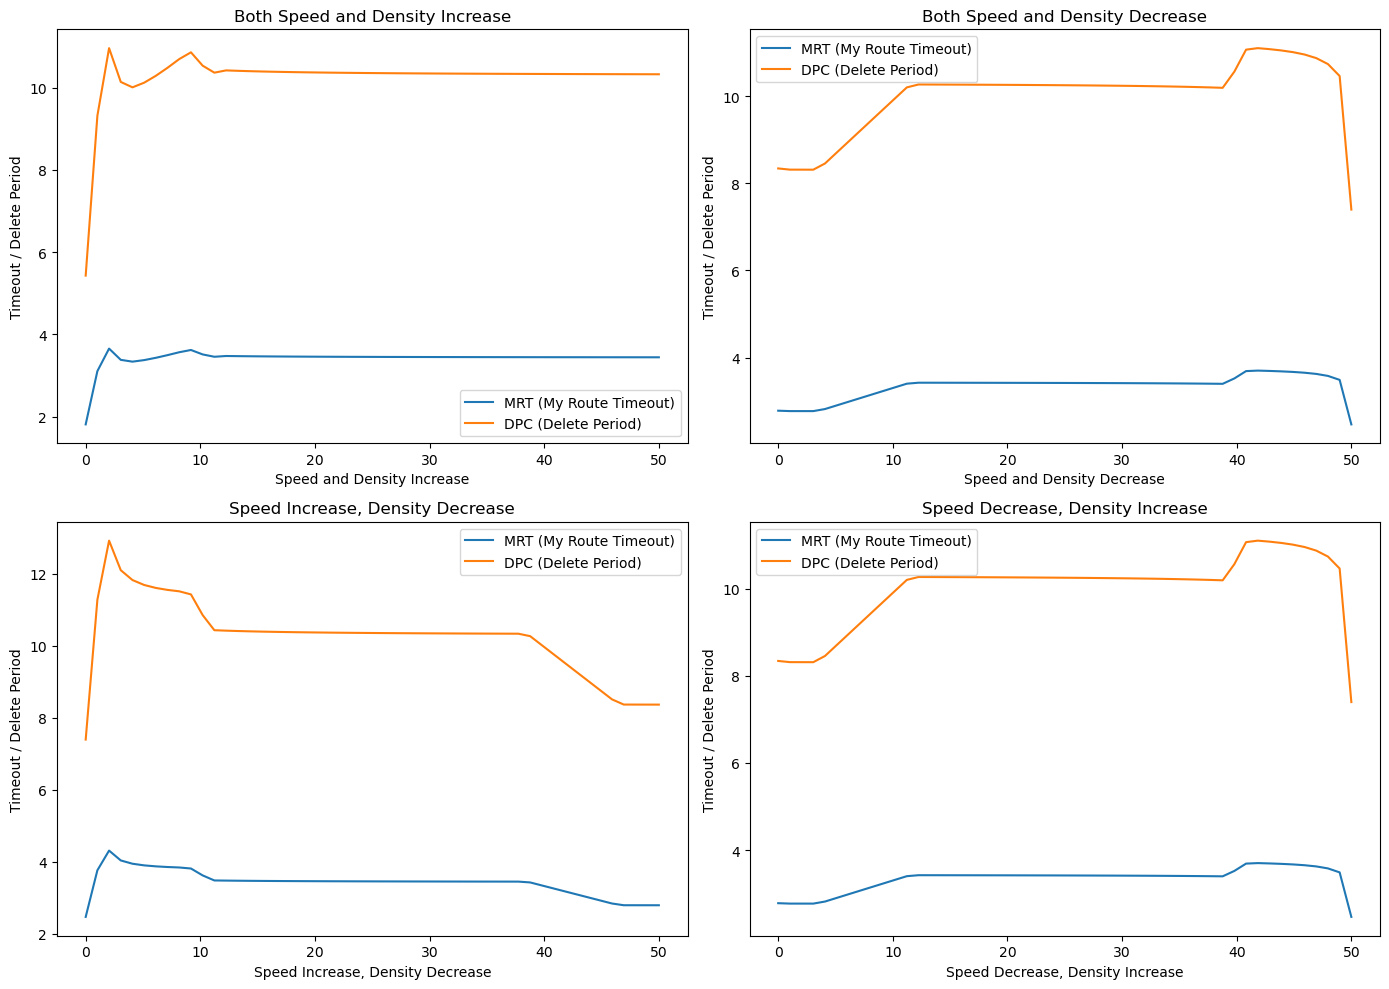

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# 설정된 상수 값들
speed_weight_base = 0.0027
density_weight_base = 0.0027
speed_weight_adjustment_factor = 0.03
speed_change_rate_factor = 0.01
base_route_timeout = 50.0
max_route_timeout = 150.0
base_delete_period = 150.0
max_delete_period = 300.0

# MRT와 DPC 계산 함수
def calculate_mrt_dpc(current_speed, weighted_density, previous_speed):
    # 속도 변화율 계산
    speed_change_rate = (current_speed - previous_speed) / previous_speed if previous_speed != 0.0 else 0.0
    #print(f"속도 변화율 (speed_change_rate): {speed_change_rate}")

    # 속도 가중치 계산
    speed_weight = speed_weight_base + max(-0.03, min((current_speed) * speed_weight_adjustment_factor, 0.03)) + max(-0.02, min(speed_change_rate * speed_change_rate_factor, 0.02))
    speed_weight = max(0.01, min(speed_weight, 0.10))
    #print(f"속도 가중치 (speed_weight): {speed_weight}")

    # 밀도 가중치 계산
    density_weight = density_weight_base + max(-0.03, min((weighted_density) * speed_weight_adjustment_factor, 0.03))
    density_weight = max(0.01, min(density_weight, 0.10))
    #print(f"밀도 가중치 (density_weight): {density_weight}")

    # 밀도 계수 및 속도 계수 계산
    density_factor = max(0.8, min(1.2, weighted_density / 8.0))
    speed_factor = max(0.9, min(1.1, 1.0 / (current_speed / 10.0))) if current_speed > 0 else 1.0
    
    print(speed_factor)

    # 상호작용 계수 계산
    interaction_factor = 1.0 + ((density_weight - speed_weight) * 0.05)
    #print(interaction_factor)

    # 조정 계수 계산
    adjusted_factor = (speed_weight * speed_factor + density_weight * density_factor) * interaction_factor

    # 경로 타임아웃 및 삭제 기간 계산
    my_route_timeout = min(base_route_timeout * adjusted_factor, max_route_timeout)
    delete_period = min(base_delete_period * adjusted_factor, max_delete_period)

    return my_route_timeout, delete_period, current_speed  # current_speed 반환

# 속도와 밀도 값의 범위 설정 (속도는 0 ~ 50, 밀도는 속도와 약간의 차이)
speeds = np.linspace(0, 50, 50)  # 속도 범위
densities_increase = speeds * 0.4 + 5  # 속도와 약간의 차이로 밀도 증가
densities_decrease = speeds[::-1] * 0.4 + 5  # 반대의 상황에서 밀도 감소

# 각 경우에 따른 MRT와 DPC 계산 결과
mrt_increase = []
dpc_increase = []
mrt_decrease = []
dpc_decrease = []
mrt_speed_up_density_down = []
dpc_speed_up_density_down = []
mrt_speed_down_density_up = []
dpc_speed_down_density_up = []

# 1. 속도와 밀도가 동시에 증가 (약간 차이)
previous_speed = 0
for speed, density in zip(speeds, densities_increase):
    mrt, dpc, previous_speed = calculate_mrt_dpc(speed, density, previous_speed)  # previous_speed 업데이트
    mrt_increase.append(mrt)
    dpc_increase.append(dpc)

# 2. 속도와 밀도가 동시에 감소 (역순)
previous_speed = 0
for speed, density in zip(speeds[::-1], densities_decrease[::-1]):
    mrt, dpc, previous_speed = calculate_mrt_dpc(speed, density, previous_speed)  # previous_speed 업데이트
    mrt_decrease.append(mrt)
    dpc_decrease.append(dpc)

# 3. 속도 증가, 밀도 감소
previous_speed = 0
for speed, density in zip(speeds, densities_decrease):
    mrt, dpc, previous_speed = calculate_mrt_dpc(speed, density, previous_speed)  # previous_speed 업데이트
    mrt_speed_up_density_down.append(mrt)
    dpc_speed_up_density_down.append(dpc)

# 4. 속도 감소, 밀도 증가
previous_speed = 0
for speed, density in zip(speeds[::-1], densities_increase):
    mrt, dpc, previous_speed = calculate_mrt_dpc(speed, density, previous_speed)  # previous_speed 업데이트
    mrt_speed_down_density_up.append(mrt)
    dpc_speed_down_density_up.append(dpc)

# 그래프 그리기
plt.figure(figsize=(14, 10))

# 1. 속도와 밀도가 동시에 증가
plt.subplot(2, 2, 1)
plt.plot(speeds, mrt_increase, label='MRT (My Route Timeout)')
plt.plot(speeds, dpc_increase, label='DPC (Delete Period)')
plt.xlabel('Speed and Density Increase')
plt.ylabel('Timeout / Delete Period')
plt.title('Both Speed and Density Increase')
plt.legend()

# 2. 속도와 밀도가 동시에 감소
plt.subplot(2, 2, 2)
plt.plot(speeds, mrt_decrease, label='MRT (My Route Timeout)')
plt.plot(speeds, dpc_decrease, label='DPC (Delete Period)')
plt.xlabel('Speed and Density Decrease')
plt.ylabel('Timeout / Delete Period')
plt.title('Both Speed and Density Decrease')
plt.legend()

# 3. 속도 증가, 밀도 감소
plt.subplot(2, 2, 3)
plt.plot(speeds, mrt_speed_up_density_down, label='MRT (My Route Timeout)')
plt.plot(speeds, dpc_speed_up_density_down, label='DPC (Delete Period)')
plt.xlabel('Speed Increase, Density Decrease')
plt.ylabel('Timeout / Delete Period')
plt.title('Speed Increase, Density Decrease')
plt.legend()

# 4. 속도 감소, 밀도 증가
plt.subplot(2, 2, 4)
plt.plot(speeds, mrt_speed_down_density_up, label='MRT (My Route Timeout)')
plt.plot(speeds, dpc_speed_down_density_up, label='DPC (Delete Period)')
plt.xlabel('Speed Decrease, Density Increase')
plt.ylabel('Timeout / Delete Period')
plt.title('Speed Decrease, Density Increase')
plt.legend()

plt.tight_layout()
plt.show()


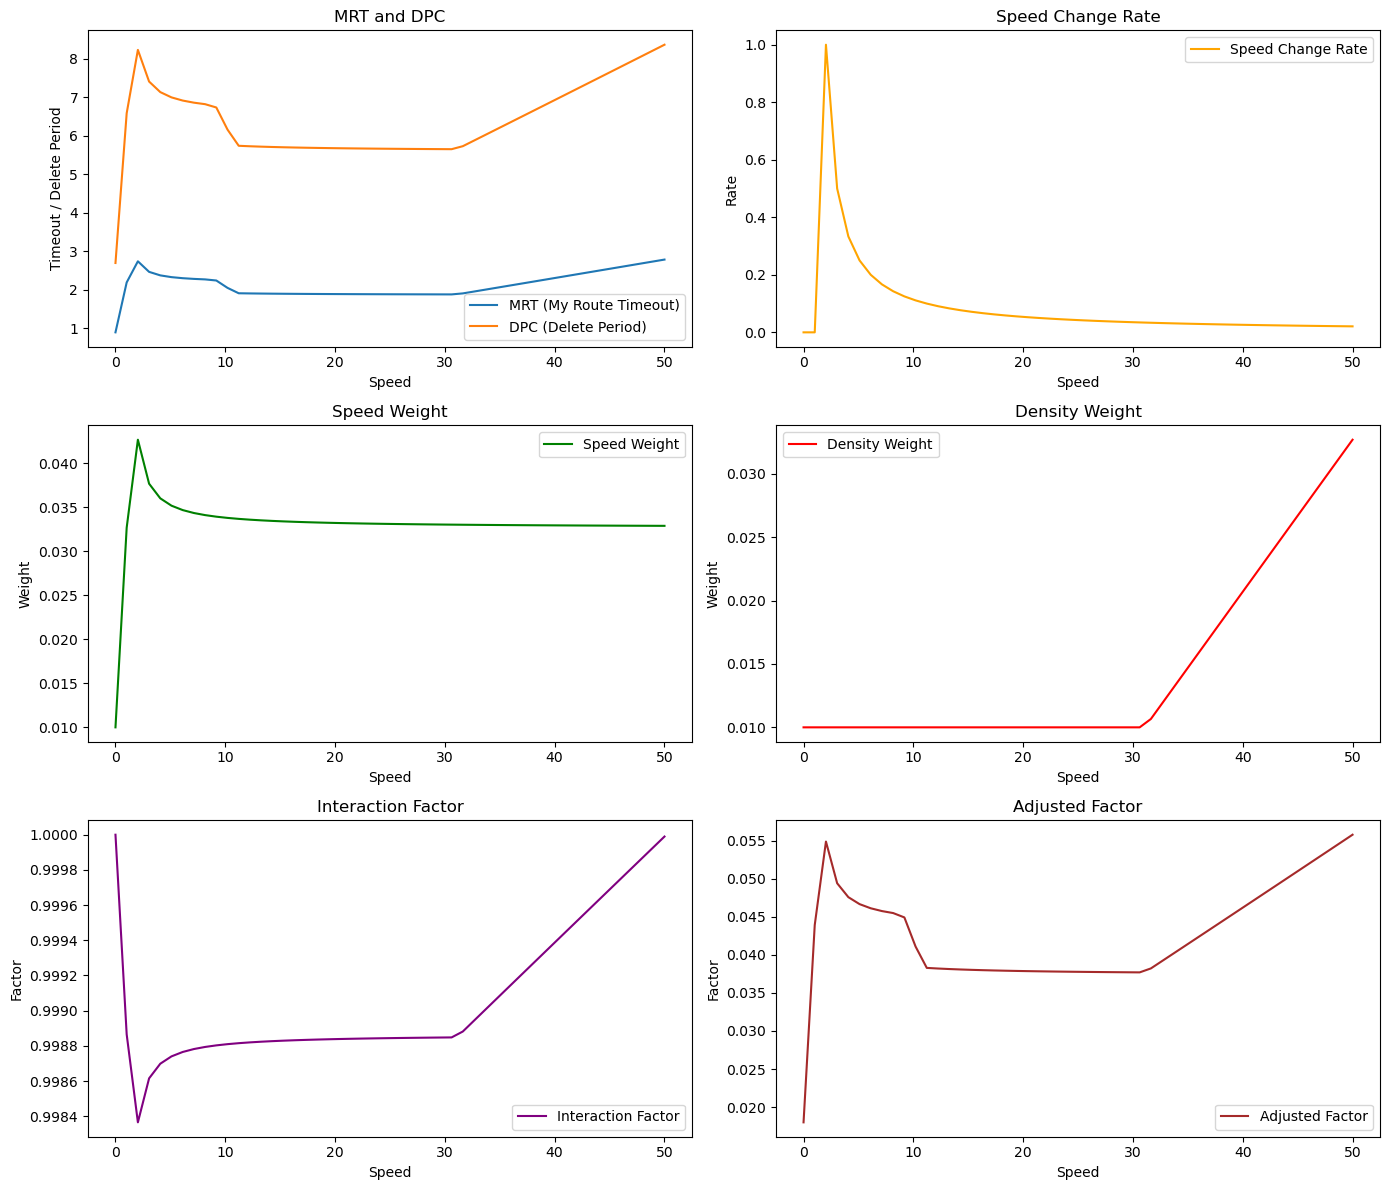

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 설정된 상수 값들
speed_weight_base = 0.0027
density_weight_base = 0.0027
speed_weight_adjustment_factor = 0.03
speed_change_rate_factor = 0.01
base_route_timeout = 50.0
max_route_timeout = 150.0
base_delete_period = 150.0
max_delete_period = 300.0

# MRT와 DPC 계산 함수
def calculate_mrt_dpc(current_speed, weighted_density, previous_speed):
    speed_change_rate = (current_speed - previous_speed) / previous_speed if previous_speed != 0.0 else 0.0

    speed_weight = speed_weight_base + max(-0.03, min((current_speed) * speed_weight_adjustment_factor, 0.03)) + max(-0.02, min(speed_change_rate * speed_change_rate_factor, 0.02))
    speed_weight = max(0.01, min(speed_weight, 0.10))

    density_weight = density_weight_base + max(-0.03, min((weighted_density) * speed_weight_adjustment_factor, 0.03))
    density_weight = max(0.01, min(density_weight, 0.10))

    density_factor = max(0.8, min(1.2, weighted_density / 8.0))
    speed_factor = max(0.9, min(1.1, 1.0 / (current_speed / 10.0))) if current_speed > 0 else 1.0

    interaction_factor = 1.0 + ((density_weight - speed_weight) * 0.05)

    adjusted_factor = (speed_weight * speed_factor + density_weight * density_factor) * interaction_factor

    my_route_timeout = min(base_route_timeout * adjusted_factor, max_route_timeout)
    delete_period = min(base_delete_period * adjusted_factor, max_delete_period)

    return my_route_timeout, delete_period, speed_change_rate, speed_weight, density_weight, interaction_factor, adjusted_factor

# 속도와 밀도 값의 범위 설정
speeds = np.linspace(0, 50, 50)
densities_increase = np.linspace(-1, 1, 50)  # 밀도 값이 [-1, 1] 범위에 있도록 설정

# 각 경우에 따른 결과 저장
previous_speed = 0
results = []

for speed, density in zip(speeds, densities_increase):
    mrt, dpc, scr, sw, dw, intf, adjf = calculate_mrt_dpc(speed, density, previous_speed)
    results.append((mrt, dpc, scr, sw, dw, intf, adjf))
    previous_speed = speed

results = np.array(results)
mrt_values, dpc_values, scr_values, sw_values, dw_values, intf_values, adjf_values = results.T

# 그래프 그리기
plt.figure(figsize=(14, 12))

# MRT와 DPC
plt.subplot(3, 2, 1)
plt.plot(speeds, mrt_values, label='MRT (My Route Timeout)')
plt.plot(speeds, dpc_values, label='DPC (Delete Period)')
plt.xlabel('Speed')
plt.ylabel('Timeout / Delete Period')
plt.title('MRT and DPC')
plt.legend()

# 속도 변화율
plt.subplot(3, 2, 2)
plt.plot(speeds, scr_values, label='Speed Change Rate', color='orange')
plt.xlabel('Speed')
plt.ylabel('Rate')
plt.title('Speed Change Rate')
plt.legend()

# 속도 가중치
plt.subplot(3, 2, 3)
plt.plot(speeds, sw_values, label='Speed Weight', color='green')
plt.xlabel('Speed')
plt.ylabel('Weight')
plt.title('Speed Weight')
plt.legend()

# 밀도 가중치
plt.subplot(3, 2, 4)
plt.plot(speeds, dw_values, label='Density Weight', color='red')
plt.xlabel('Speed')
plt.ylabel('Weight')
plt.title('Density Weight')
plt.legend()

# 상호작용 계수
plt.subplot(3, 2, 5)
plt.plot(speeds, intf_values, label='Interaction Factor', color='purple')
plt.xlabel('Speed')
plt.ylabel('Factor')
plt.title('Interaction Factor')
plt.legend()

# 조정 계수
plt.subplot(3, 2, 6)
plt.plot(speeds, adjf_values, label='Adjusted Factor', color='brown')
plt.xlabel('Speed')
plt.ylabel('Factor')
plt.title('Adjusted Factor')
plt.legend()

plt.tight_layout()
plt.show()


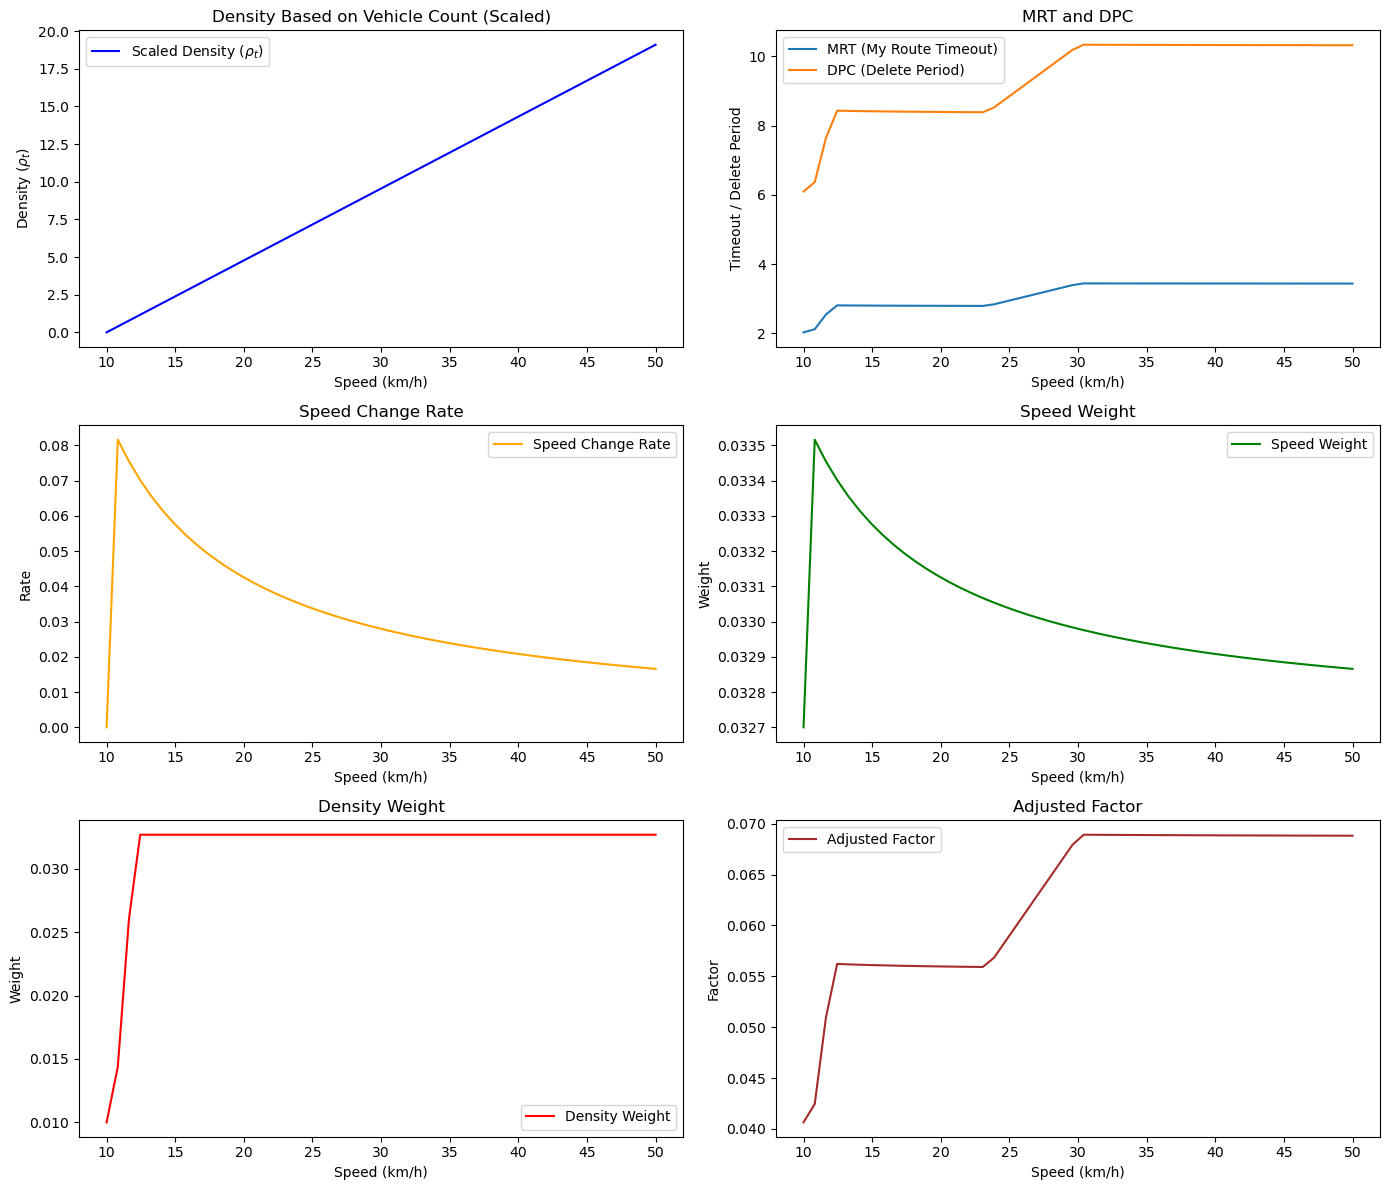

In [45]:
# 반경 및 차량 수 설정
R = 50  # 반경 50m
pi = np.pi
scaling_factor = 1e4  # 스케일링 상수

# 차량 수 (N_t)를 0부터 50까지 증가시키며 밀도 계산
vehicle_counts = np.linspace(0, 15, 50)  # 차량 수 범위
densities = (vehicle_counts / (pi * R**2)) * scaling_factor  # 밀도 값 스케일 업

# 속도와 밀도 값의 범위 설정
speeds = np.linspace(10, 50, 50)

# 기존 함수와 연결 (밀도 기반 계산)
previous_speed = 0
results = []

for speed, density in zip(speeds, densities):
    mrt, dpc, scr, sw, dw, intf, adjf = calculate_mrt_dpc(speed, density, previous_speed)
    results.append((mrt, dpc, scr, sw, dw, intf, adjf))
    previous_speed = speed

results = np.array(results)
mrt_values, dpc_values, scr_values, sw_values, dw_values, intf_values, adjf_values = results.T

# 그래프 그리기
plt.figure(figsize=(14, 12))

# 밀도 값 그래프
plt.subplot(3, 2, 1)
plt.plot(speeds, densities, label='Scaled Density ($\\rho_t$)', color='blue')
plt.xlabel('Speed (km/h)')
plt.ylabel('Density ($\\rho_t$)')
plt.title('Density Based on Vehicle Count (Scaled)')
plt.legend()

# MRT와 DPC
plt.subplot(3, 2, 2)
plt.plot(speeds, mrt_values, label='MRT (My Route Timeout)')
plt.plot(speeds, dpc_values, label='DPC (Delete Period)')
plt.xlabel('Speed (km/h)')
plt.ylabel('Timeout / Delete Period')
plt.title('MRT and DPC')
plt.legend()

# 속도 변화율
plt.subplot(3, 2, 3)
plt.plot(speeds, scr_values, label='Speed Change Rate', color='orange')
plt.xlabel('Speed (km/h)')
plt.ylabel('Rate')
plt.title('Speed Change Rate')
plt.legend()

# 속도 가중치
plt.subplot(3, 2, 4)
plt.plot(speeds, sw_values, label='Speed Weight', color='green')
plt.xlabel('Speed (km/h)')
plt.ylabel('Weight')
plt.title('Speed Weight')
plt.legend()

# 밀도 가중치
plt.subplot(3, 2, 5)
plt.plot(speeds, dw_values, label='Density Weight', color='red')
plt.xlabel('Speed (km/h)')
plt.ylabel('Weight')
plt.title('Density Weight')
plt.legend()

# 조정 계수
plt.subplot(3, 2, 6)
plt.plot(speeds, adjf_values, label='Adjusted Factor', color='brown')
plt.xlabel('Speed (km/h)')
plt.ylabel('Factor')
plt.title('Adjusted Factor')
plt.legend()

plt.tight_layout()
plt.show()


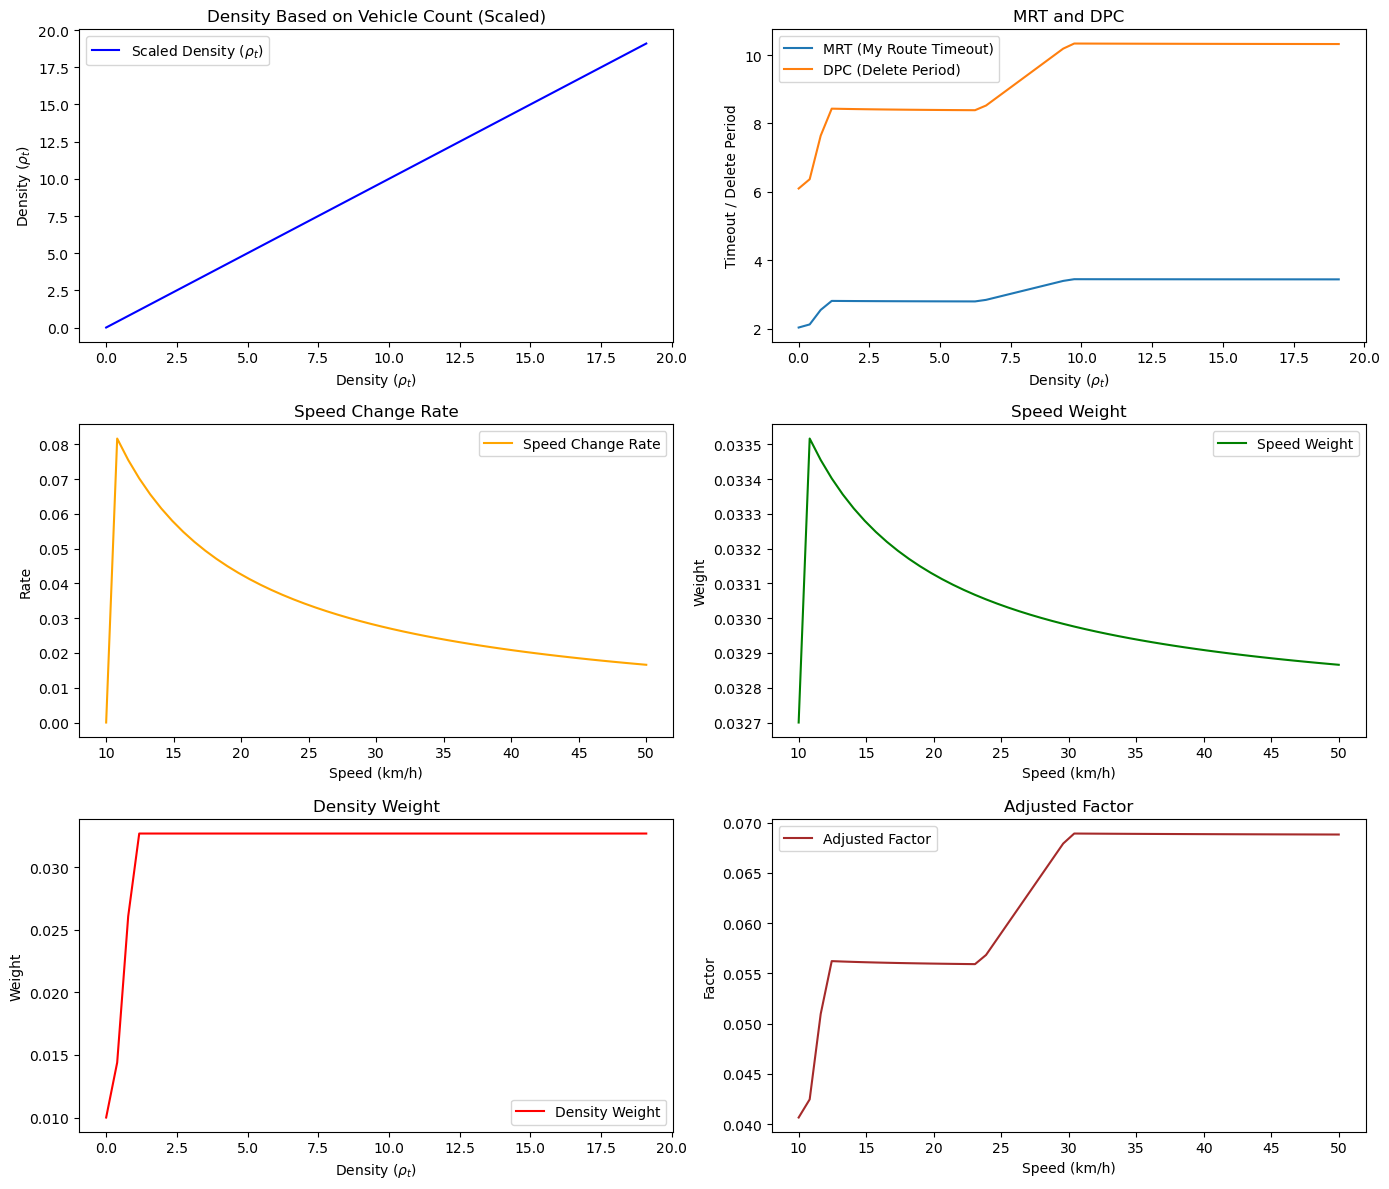

In [ ]:
# 반경 및 차량 수 설정
R = 50  # 반경 50m
pi = np.pi
scaling_factor = 1e4  # 스케일링 상수

# 차량 수 (N_t)를 0부터 15까지 증가시키며 밀도 계산
vehicle_counts = np.linspace(0, 15, 50)  # 차량 수 범위
densities = (vehicle_counts / (pi * R**2)) * scaling_factor  # 밀도 값 스케일 업

# 속도와 밀도 값의 범위 설정
speeds = np.linspace(10, 50, 50)

# 기존 함수와 연결 (밀도 기반 계산)
previous_speed = 10  # 속도 10부터 시작
results = []

for speed, density in zip(speeds, densities):
    mrt, dpc, scr, sw, dw, intf, adjf = calculate_mrt_dpc(speed, density, previous_speed)
    results.append((mrt, dpc, scr, sw, dw, intf, adjf))
    previous_speed = speed

results = np.array(results)
mrt_values, dpc_values, scr_values, sw_values, dw_values, intf_values, adjf_values = results.T

# 그래프 그리기
plt.figure(figsize=(14, 12))

# 밀도 값 그래프 (x축: Density)
plt.subplot(3, 2, 1)
plt.plot(densities, densities, label='Scaled Density ($\\rho_t$)', color='blue')  # x축을 densities로
plt.xlabel('Density ($\\rho_t$)')
plt.ylabel('Density ($\\rho_t$)')
plt.title('Density Based on Vehicle Count (Scaled)')
plt.legend()

# MRT와 DPC (x축: Density)
plt.subplot(3, 2, 2)
plt.plot(densities, mrt_values, label='MRT (My Route Timeout)')
plt.plot(densities, dpc_values, label='DPC (Delete Period)')
plt.xlabel('Density ($\\rho_t$)')
plt.ylabel('Timeout / Delete Period')
plt.title('MRT and DPC')
plt.legend()

# 속도 변화율 (x축: Speed)
plt.subplot(3, 2, 3)
plt.plot(speeds, scr_values, label='Speed Change Rate', color='orange')
plt.xlabel('Speed (km/h)')
plt.ylabel('Rate')
plt.title('Speed Change Rate')
plt.legend()

# 속도 가중치 (x축: Speed)
plt.subplot(3, 2, 4)
plt.plot(speeds, sw_values, label='Speed Weight', color='green')
plt.xlabel('Speed (km/h)')
plt.ylabel('Weight')
plt.title('Speed Weight')
plt.legend()

# 밀도 가중치 (x축: Density)
plt.subplot(3, 2, 5)
plt.plot(densities, dw_values, label='Density Weight', color='red')
plt.xlabel('Density ($\\rho_t$)')
plt.ylabel('Weight')
plt.title('Density Weight')
plt.legend()

# 조정 계수 (x축: Speed)
plt.subplot(3, 2, 6)
plt.plot(speeds, adjf_values, label='Adjusted Factor', color='brown')
plt.xlabel('Speed (km/h)')
plt.ylabel('Factor')
plt.title('Adjusted Factor')
plt.legend()

plt.tight_layout()
plt.show()


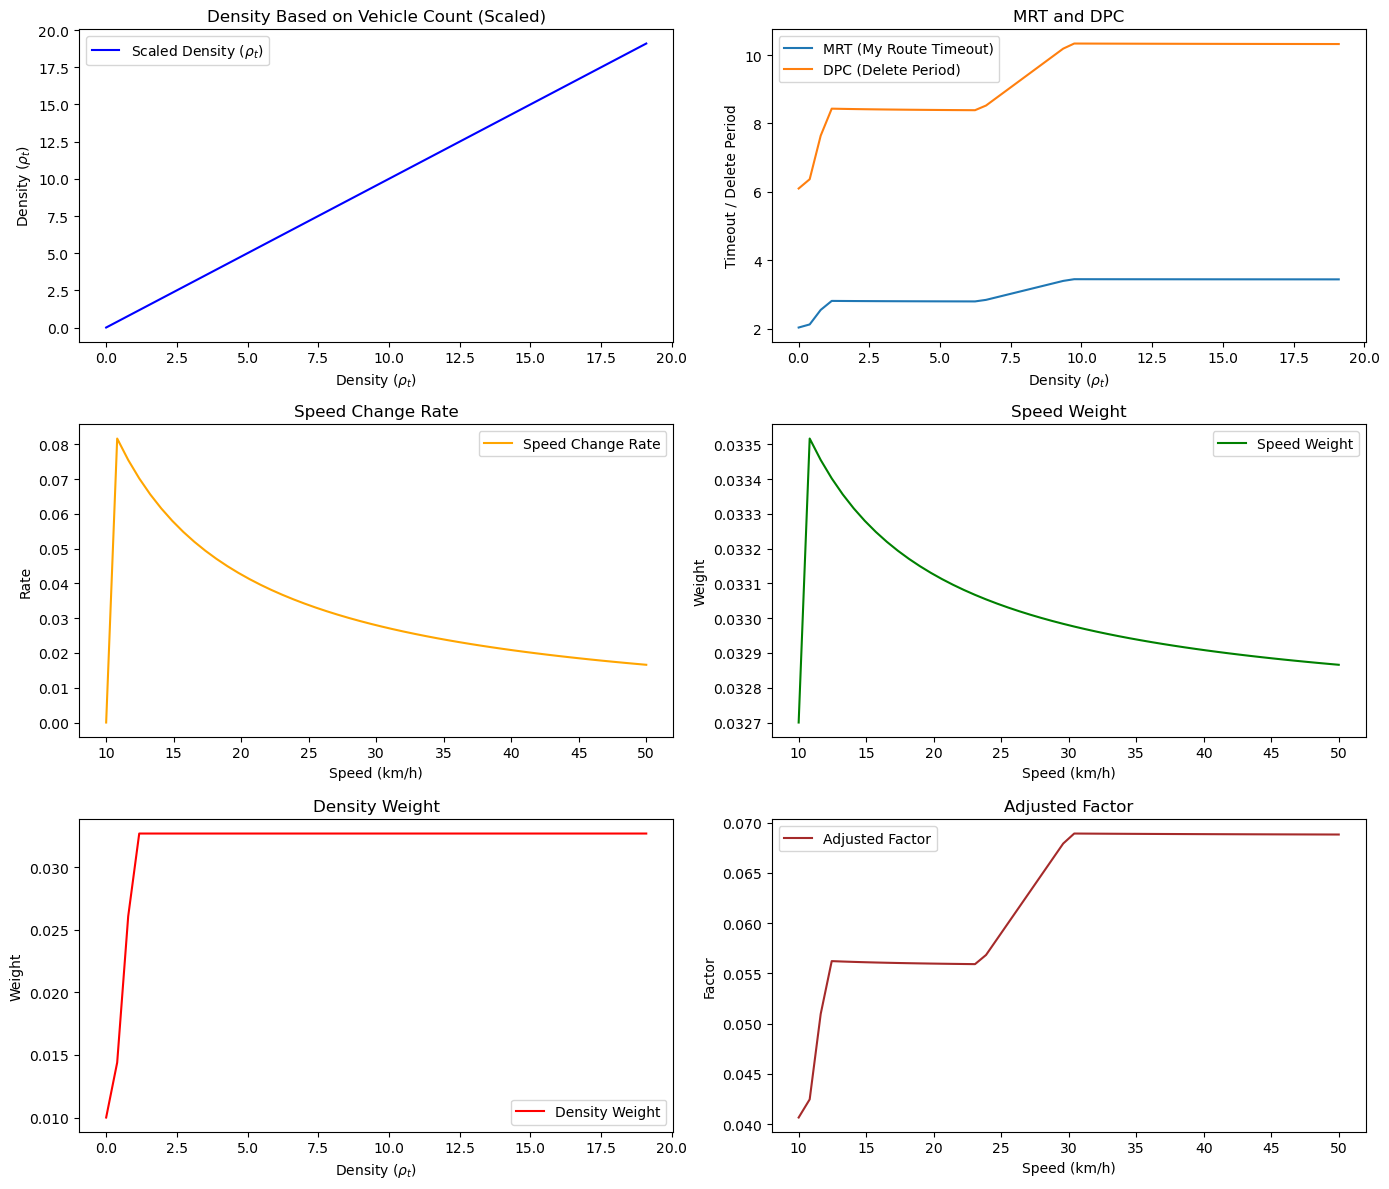

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 설정된 상수 값들
speed_weight_base = 0.0027
density_weight_base = 0.0027
speed_weight_adjustment_factor = 0.03
speed_change_rate_factor = 0.01
base_route_timeout = 50.0
max_route_timeout = 150.0
base_delete_period = 150.0
max_delete_period = 300.0

# MRT와 DPC 계산 함수
def calculate_mrt_dpc(current_speed, weighted_density, previous_speed):
    speed_change_rate = (current_speed - previous_speed) / previous_speed if previous_speed != 0.0 else 0.0

    speed_weight = speed_weight_base + max(-0.03, min((current_speed) * speed_weight_adjustment_factor, 0.03)) + max(-0.02, min(speed_change_rate * speed_change_rate_factor, 0.02))
    speed_weight = max(0.01, min(speed_weight, 0.10))

    density_weight = density_weight_base + max(-0.03, min((weighted_density) * speed_weight_adjustment_factor, 0.03))
    density_weight = max(0.01, min(density_weight, 0.10))

    density_factor = max(0.8, min(1.2, weighted_density / 8.0))
    speed_factor = max(0.9, min(1.1, 1.0 / (current_speed / 10.0))) if current_speed > 0 else 1.0

    interaction_factor = 1.0 + ((density_weight - speed_weight) * 0.05)

    adjusted_factor = (speed_weight * speed_factor + density_weight * density_factor) * interaction_factor

    my_route_timeout = min(base_route_timeout * adjusted_factor, max_route_timeout)
    delete_period = min(base_delete_period * adjusted_factor, max_delete_period)

    return my_route_timeout, delete_period, speed_change_rate, speed_weight, density_weight, interaction_factor, adjusted_factor

# 반경 및 차량 수 설정
R = 50  # 반경 50m
pi = np.pi
scaling_factor = 1e4  # 스케일링 상수

# 차량 수 (N_t)를 0부터 15까지 증가시키며 밀도 계산
vehicle_counts = np.linspace(0, 15, 50)  # 차량 수 범위
densities = (vehicle_counts / (pi * R**2)) * scaling_factor  # 밀도 값 스케일 업

# 속도와 밀도 값의 범위 설정
speeds = np.linspace(10, 50, 50)

# 기존 함수와 연결 (밀도 기반 계산)
previous_speed = 10  # 속도 10부터 시작
results = []

for speed, density in zip(speeds, densities):
    mrt, dpc, scr, sw, dw, intf, adjf = calculate_mrt_dpc(speed, density, previous_speed)
    results.append((mrt, dpc, scr, sw, dw, intf, adjf))
    previous_speed = speed

results = np.array(results)
mrt_values, dpc_values, scr_values, sw_values, dw_values, intf_values, adjf_values = results.T

# 그래프 그리기
plt.figure(figsize=(14, 12))

# 밀도 값 그래프 (x축: Density)
plt.subplot(3, 2, 1)
plt.plot(densities, densities, label='Scaled Density ($\\rho_t$)', color='blue')  # x축을 densities로
plt.xlabel('Density ($\\rho_t$)')
plt.ylabel('Density ($\\rho_t$)')
plt.title('Density Based on Vehicle Count (Scaled)')
plt.legend()

# MRT와 DPC (x축: Density)
plt.subplot(3, 2, 2)
plt.plot(densities, mrt_values, label='MRT (My Route Timeout)')
plt.plot(densities, dpc_values, label='DPC (Delete Period)')
plt.xlabel('Density ($\\rho_t$)')
plt.ylabel('Timeout / Delete Period')
plt.title('MRT and DPC')
plt.legend()

# 속도 변화율 (x축: Speed)
plt.subplot(3, 2, 3)
plt.plot(speeds, scr_values, label='Speed Change Rate', color='orange')
plt.xlabel('Speed (km/h)')
plt.ylabel('Rate')
plt.title('Speed Change Rate')
plt.legend()

# 속도 가중치 (x축: Speed)
plt.subplot(3, 2, 4)
plt.plot(speeds, sw_values, label='Speed Weight', color='green')
plt.xlabel('Speed (km/h)')
plt.ylabel('Weight')
plt.title('Speed Weight')
plt.legend()

# 밀도 가중치 (x축: Density)
plt.subplot(3, 2, 5)
plt.plot(densities, dw_values, label='Density Weight', color='red')  # x축을 densities로
plt.xlabel('Density ($\\rho_t$)')
plt.ylabel('Weight')
plt.title('Density Weight')
plt.legend()

# 조정 계수 (x축: Speed)
plt.subplot(3, 2, 6)
plt.plot(speeds, adjf_values, label='Adjusted Factor', color='brown')
plt.xlabel('Speed (km/h)')
plt.ylabel('Factor')
plt.title('Adjusted Factor')
plt.legend()

plt.tight_layout()
plt.show()


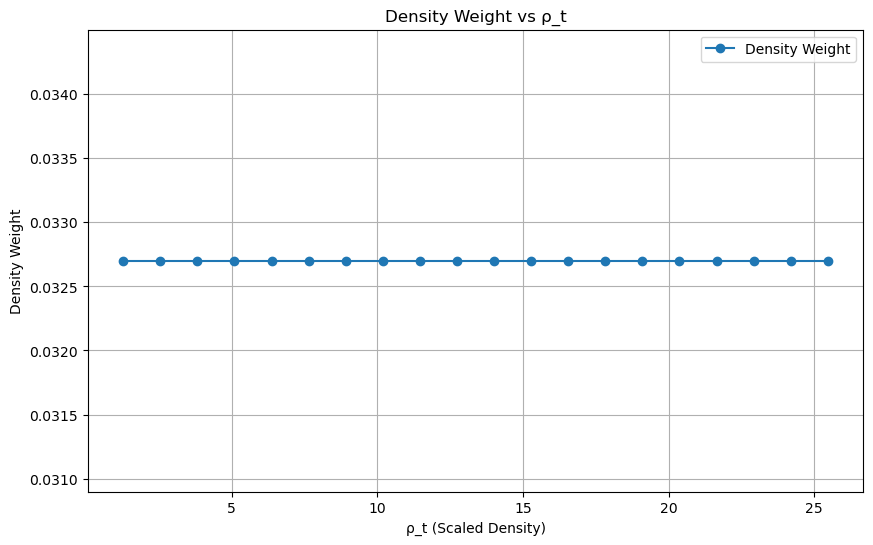

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# 상수 설정
R = 50  # 반경 50m
pi = np.pi
scaling_factor = 1e4  # 스케일링 상수
density_weight_base = 0.0027
speed_weight_adjustment_factor = 0.03

# 밀도와 density_weight 계산 함수
def calculate_density_weight(N_t):
    rho_t = (N_t / (pi * R**2)) * scaling_factor  # ρ_t 계산
    density_weight = density_weight_base + max(-0.03, min(rho_t * speed_weight_adjustment_factor, 0.03))
    density_weight = max(0.01, min(density_weight, 0.10))
    return rho_t, density_weight

# N_t를 1부터 20까지 설정
vehicle_counts = np.arange(1, 21)

# ρ_t와 density_weight 계산
rho_t_values = []
density_weights = []

for N_t in vehicle_counts:
    rho_t, density_weight = calculate_density_weight(N_t)
    rho_t_values.append(rho_t)
    density_weights.append(density_weight)

# 플롯
plt.figure(figsize=(10, 6))
plt.plot(rho_t_values, density_weights, marker='o', label="Density Weight")
plt.xlabel("ρ_t (Scaled Density)")
plt.ylabel("Density Weight")
plt.title("Density Weight vs ρ_t")
plt.grid(True)
plt.legend()
plt.show()


In [57]:
# 밀도가 5일 때 Density Weight 계산
rho_t = 1.1  # 밀도 값
density_weight = density_weight_base + max(-0.03, min((rho_t) * speed_weight_adjustment_factor, 0.03))
density_weight = max(0.01, min(density_weight, 0.10))

print("Density Weight when ρ_t = 5:", density_weight)


Density Weight when ρ_t = 5: 0.0327


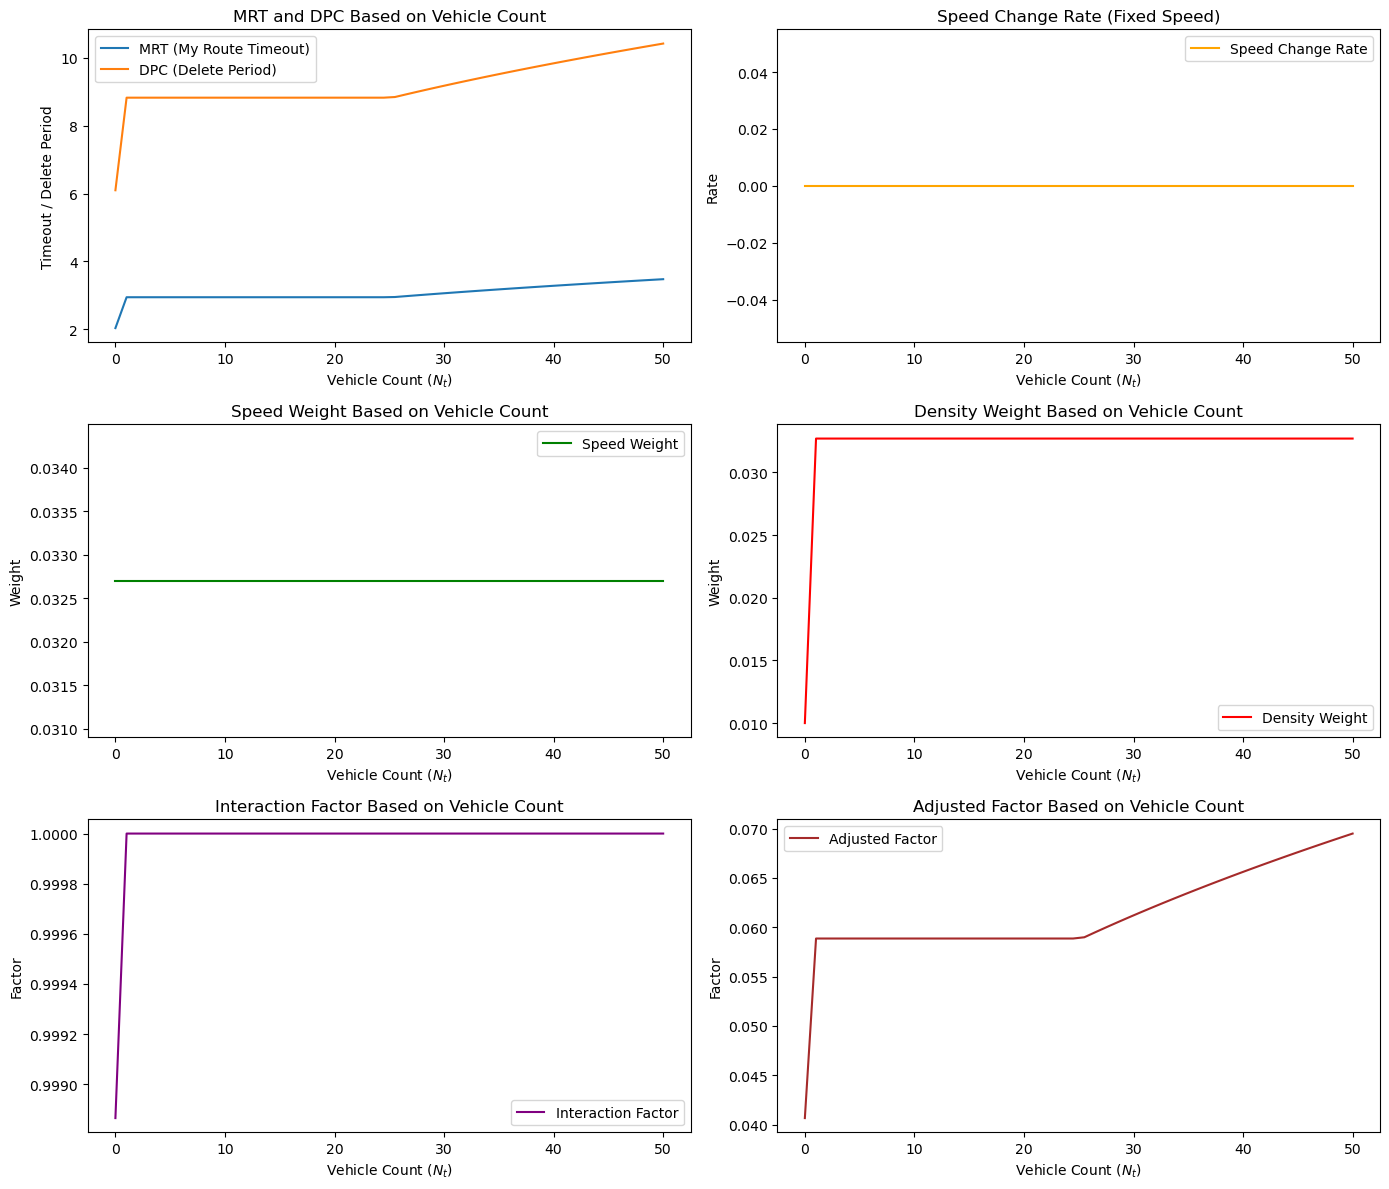

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 반경 및 차량 수 설정
R = 50  # 반경 50m
pi = np.pi
scaling_factor = 1e4  # 스케일링 상수

# 차량 수 (N_t)를 생성
vehicle_counts = np.linspace(0, 50, 50)  # 차량 수 범위
densities = (np.sqrt(vehicle_counts) / (pi * R**2)) * scaling_factor  # 밀도 값 계산

# 속도는 일정값으로 고정
fixed_speed = 10  # 고정된 속도값

# 기존 함수와 연결 (밀도 기반 계산)
previous_speed = 0
results = []

for vehicle_count, density in zip(vehicle_counts, densities):
    mrt, dpc, scr, sw, dw, intf, adjf = calculate_mrt_dpc(fixed_speed, density, previous_speed)
    results.append((mrt, dpc, scr, sw, dw, intf, adjf))
    previous_speed = fixed_speed  # 고정 속도로 유지

results = np.array(results)
mrt_values, dpc_values, scr_values, sw_values, dw_values, intf_values, adjf_values = results.T

# 그래프 그리기
plt.figure(figsize=(14, 12))

# MRT와 DPC
plt.subplot(3, 2, 1)
plt.plot(vehicle_counts, mrt_values, label='MRT (My Route Timeout)')
plt.plot(vehicle_counts, dpc_values, label='DPC (Delete Period)')
plt.xlabel('Vehicle Count ($N_t$)')
plt.ylabel('Timeout / Delete Period')
plt.title('MRT and DPC Based on Vehicle Count')
plt.legend()

# 속도 변화율
plt.subplot(3, 2, 2)
plt.plot(vehicle_counts, scr_values, label='Speed Change Rate', color='orange')
plt.xlabel('Vehicle Count ($N_t$)')
plt.ylabel('Rate')
plt.title('Speed Change Rate (Fixed Speed)')
plt.legend()

# 속도 가중치
plt.subplot(3, 2, 3)
plt.plot(vehicle_counts, sw_values, label='Speed Weight', color='green')
plt.xlabel('Vehicle Count ($N_t$)')
plt.ylabel('Weight')
plt.title('Speed Weight Based on Vehicle Count')
plt.legend()

# 밀도 가중치
plt.subplot(3, 2, 4)
plt.plot(vehicle_counts, dw_values, label='Density Weight', color='red')
plt.xlabel('Vehicle Count ($N_t$)')
plt.ylabel('Weight')
plt.title('Density Weight Based on Vehicle Count')
plt.legend()

# 상호작용 계수
plt.subplot(3, 2, 5)
plt.plot(vehicle_counts, intf_values, label='Interaction Factor', color='purple')
plt.xlabel('Vehicle Count ($N_t$)')
plt.ylabel('Factor')
plt.title('Interaction Factor Based on Vehicle Count')
plt.legend()

# 조정 계수
plt.subplot(3, 2, 6)
plt.plot(vehicle_counts, adjf_values, label='Adjusted Factor', color='brown')
plt.xlabel('Vehicle Count ($N_t$)')
plt.ylabel('Factor')
plt.title('Adjusted Factor Based on Vehicle Count')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
# 속도와 밀도 값의 조정된 범위 설정
densities_increase = speeds * 0.7 + np.sin(speeds / 5) * 10  # 비선형 변화 추가
densities_increase = np.clip(densities_increase, 10, 50)  # 밀도의 상한과 하한 설정

# 밀도 값 출력
print("Modified Density values:", densities_increase)


Modified Density values: [16.09297427 12.61133874 10.         10.         12.79342929 24.1611669
 34.34163536 38.1073991  34.97437531 29.55978889]


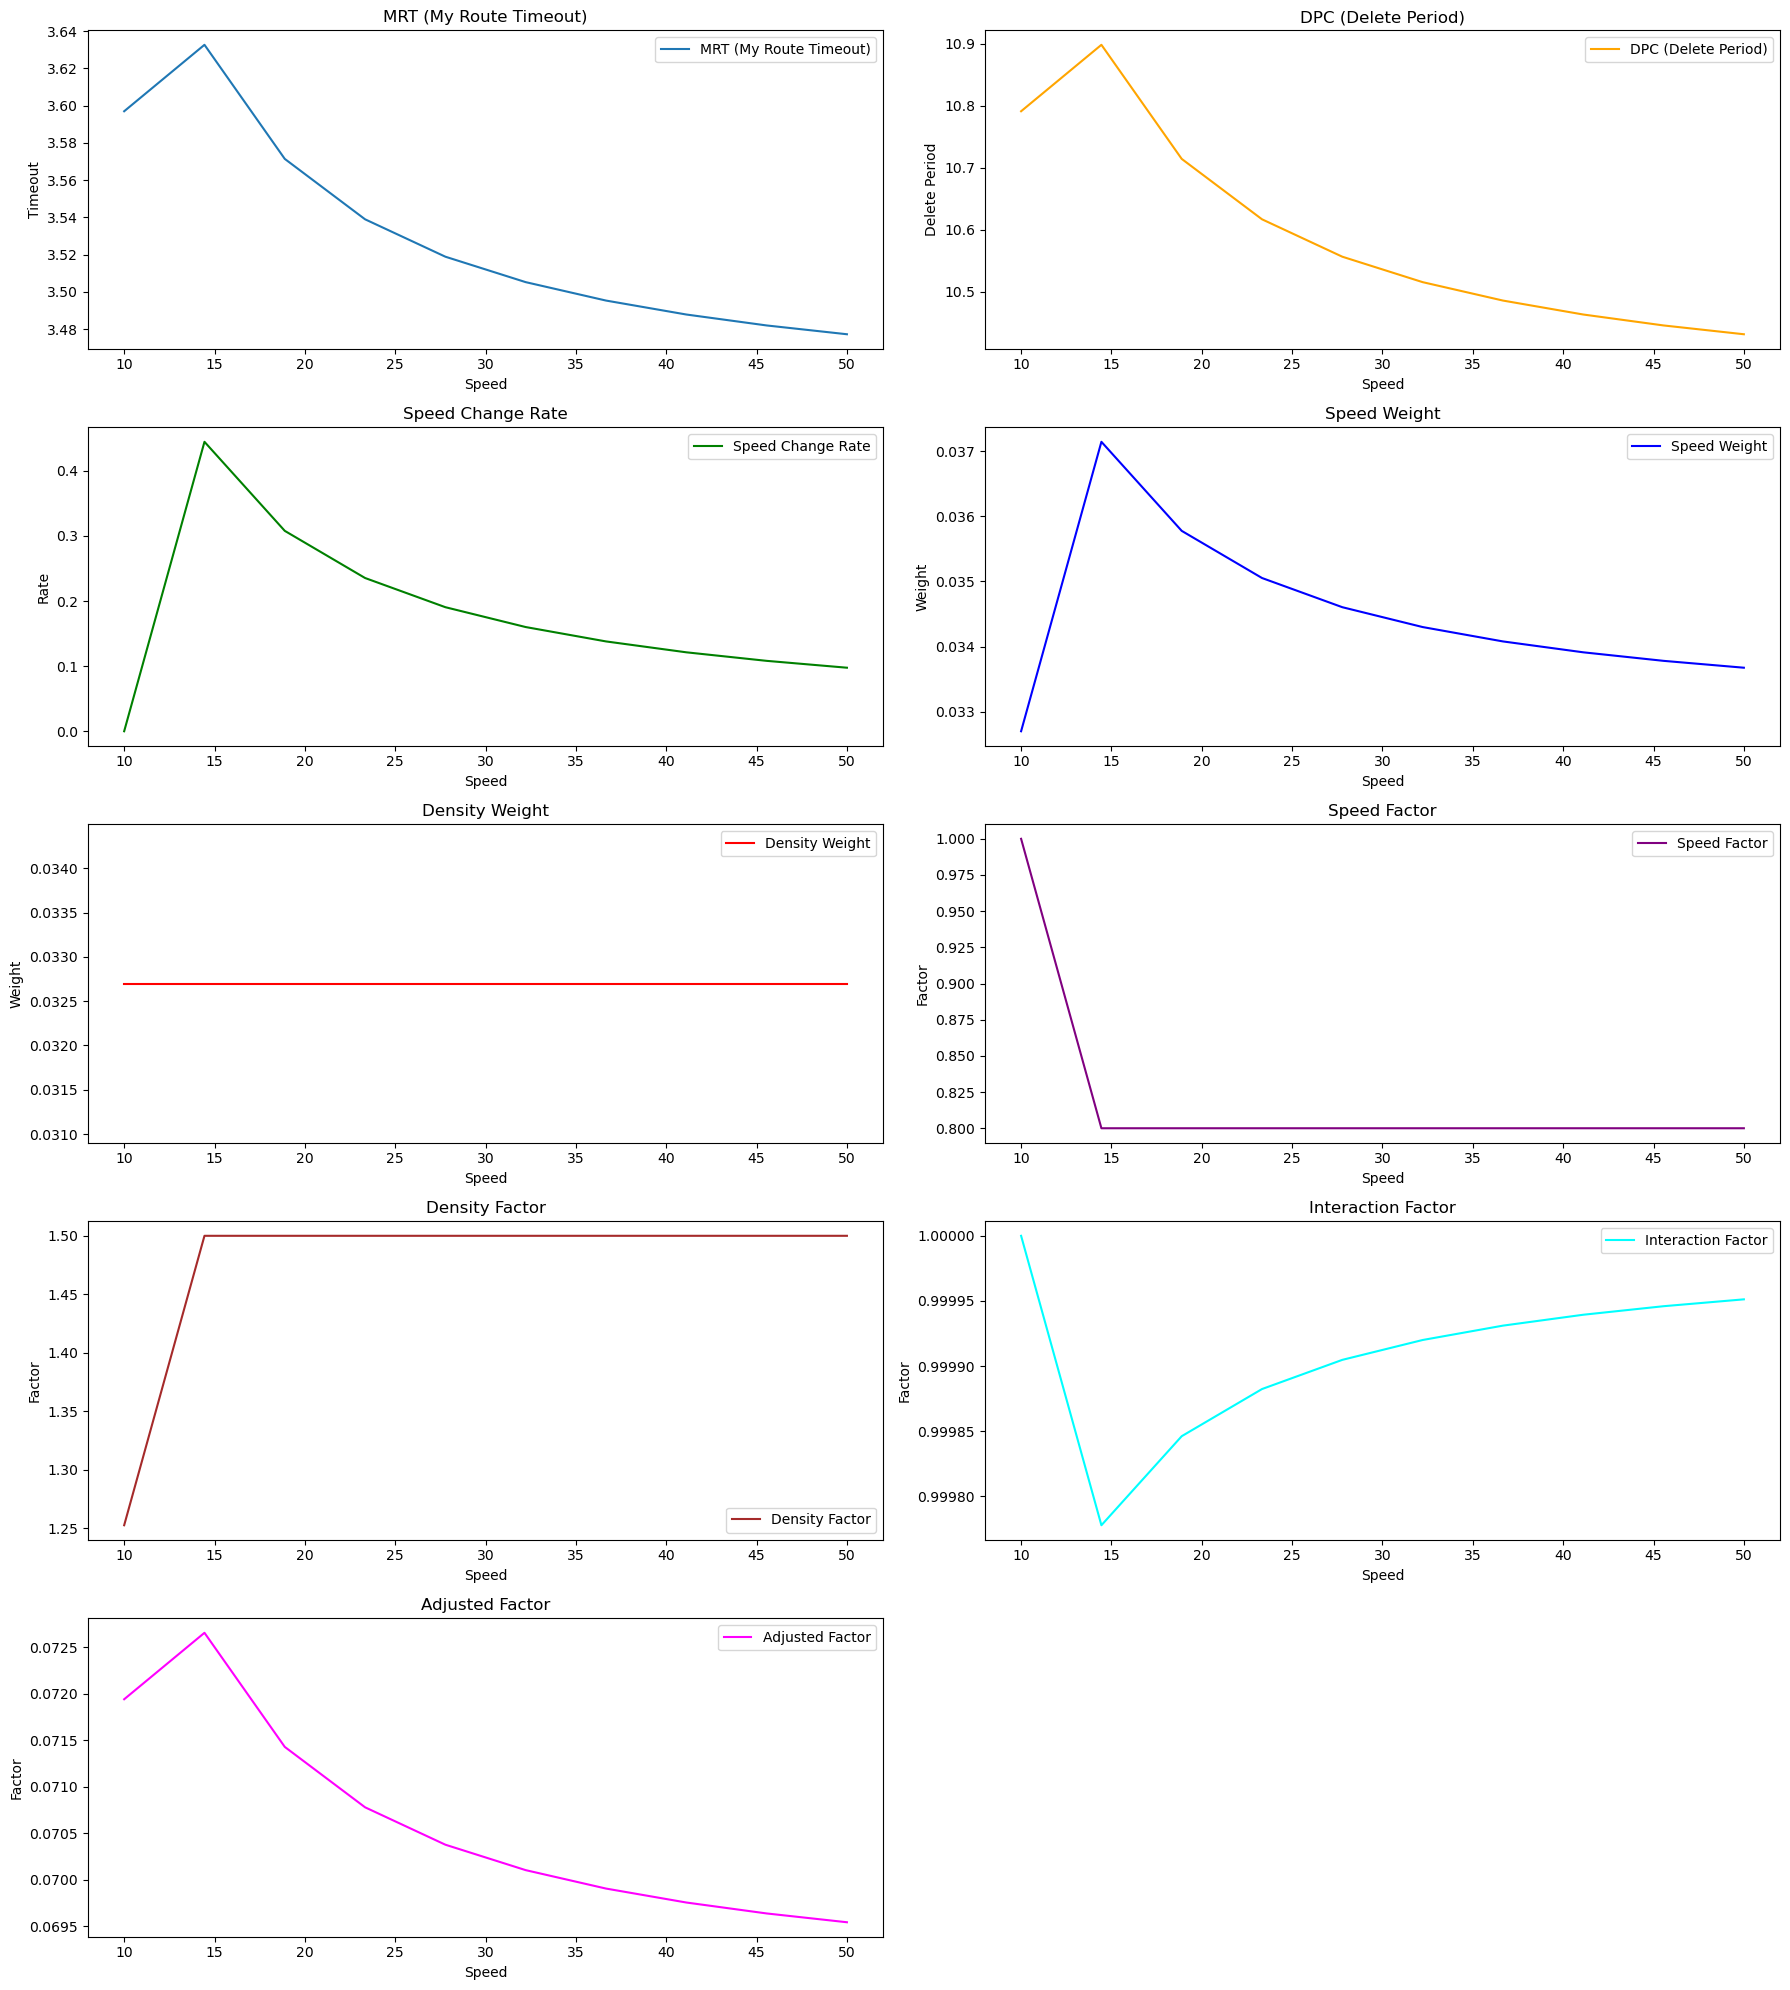

In [21]:
# 밀도 값 범위 수정
densities_increase = speeds * 0.5 + 5 + np.sin(speeds / 10) * 3  # 비선형 변화 추가

# 결과 저장 및 계산
previous_speed = speeds[0]
results = []

for speed, density in zip(speeds, densities_increase):
    mrt, dpc, scr, sw, dw, intf, adjf = calculate_mrt_dpc(speed, density, previous_speed)
    density_factor = max(0.6, min(1.5, density / 10.0))  # 밀도 계수 조정
    speed_factor = max(0.8, min(1.2, 1.0 / (speed / 10.0))) if speed > 0 else 1.0
    density_weight = density_weight_base + max(-0.03, min(density * 0.005, 0.03))  # 비선형 변화 추가
    density_weight = max(0.01, min(density_weight, 0.10))  # 제한 범위 유지
    results.append((mrt, dpc, scr, sw, density_weight, intf, adjf, density_factor, speed_factor))
    previous_speed = max(speed, previous_speed)

results = np.array(results)
mrt_values, dpc_values, scr_values, sw_values, dw_values, intf_values, adjf_values, density_factors, speed_factors = results.T

# 그래프 생성
plt.figure(figsize=(18, 20))

plt.subplot(5, 2, 1)
plt.plot(speeds, mrt_values, label='MRT (My Route Timeout)')
plt.xlabel('Speed')
plt.ylabel('Timeout')
plt.title('MRT (My Route Timeout)')
plt.legend()

plt.subplot(5, 2, 2)
plt.plot(speeds, dpc_values, label='DPC (Delete Period)', color='orange')
plt.xlabel('Speed')
plt.ylabel('Delete Period')
plt.title('DPC (Delete Period)')
plt.legend()

plt.subplot(5, 2, 3)
plt.plot(speeds, scr_values, label='Speed Change Rate', color='green')
plt.xlabel('Speed')
plt.ylabel('Rate')
plt.title('Speed Change Rate')
plt.legend()

plt.subplot(5, 2, 4)
plt.plot(speeds, sw_values, label='Speed Weight', color='blue')
plt.xlabel('Speed')
plt.ylabel('Weight')
plt.title('Speed Weight')
plt.legend()

plt.subplot(5, 2, 5)
plt.plot(speeds, dw_values, label='Density Weight', color='red')
plt.xlabel('Speed')
plt.ylabel('Weight')
plt.title('Density Weight')
plt.legend()

plt.subplot(5, 2, 6)
plt.plot(speeds, speed_factors, label='Speed Factor', color='purple')
plt.xlabel('Speed')
plt.ylabel('Factor')
plt.title('Speed Factor')
plt.legend()

plt.subplot(5, 2, 7)
plt.plot(speeds, density_factors, label='Density Factor', color='brown')
plt.xlabel('Speed')
plt.ylabel('Factor')
plt.title('Density Factor')
plt.legend()

plt.subplot(5, 2, 8)
plt.plot(speeds, intf_values, label='Interaction Factor', color='cyan')
plt.xlabel('Speed')
plt.ylabel('Factor')
plt.title('Interaction Factor')
plt.legend()

plt.subplot(5, 2, 9)
plt.plot(speeds, adjf_values, label='Adjusted Factor', color='magenta')
plt.xlabel('Speed')
plt.ylabel('Factor')
plt.title('Adjusted Factor')
plt.legend()

plt.tight_layout()
plt.show()


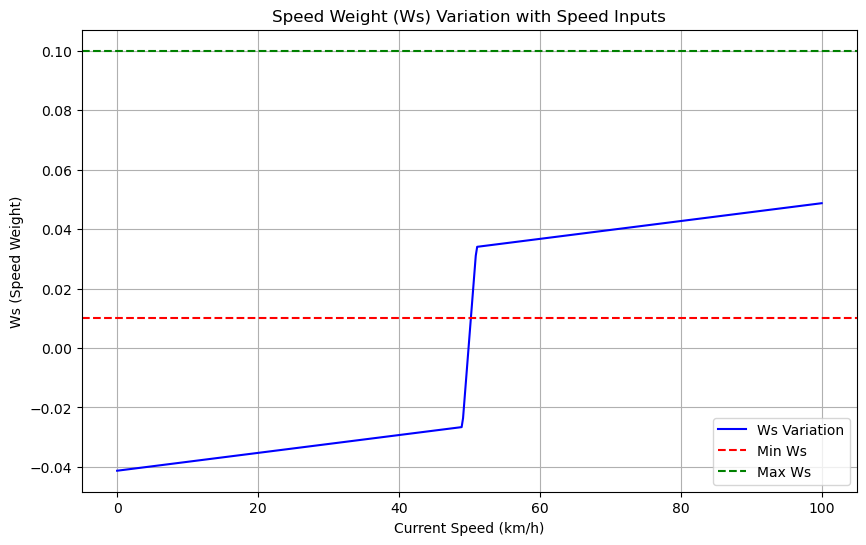

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
speed_current = np.linspace(0, 100, 500)  # Current speed range (0 to 100 km/h)
speed_avg = 50  # Average speed (km/h)
delta_s = np.linspace(-0.5, 0.5, 500)  # Speed change rate range (-0.5 to 0.5)
W_base = 0.0037  # Base speed weight
F_s = 0.03  # Sensitivity coefficient
F_change = 0.03  # Speed change rate coefficient

# Calculate Ws based on inputs
Ws = (
    W_base
    + np.maximum(-0.03, np.minimum((speed_current - speed_avg) * F_s, 0.03))
    + np.maximum(-0.02, np.minimum(delta_s * F_change, 0.02))
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(speed_current, Ws, label="Ws Variation", color='blue')
plt.axhline(y=0.01, color='red', linestyle='--', label="Min Ws")
plt.axhline(y=0.10, color='green', linestyle='--', label="Max Ws")
plt.title("Speed Weight (Ws) Variation with Speed Inputs")
plt.xlabel("Current Speed (km/h)")
plt.ylabel("Ws (Speed Weight)")
plt.legend()
plt.grid()
plt.show()


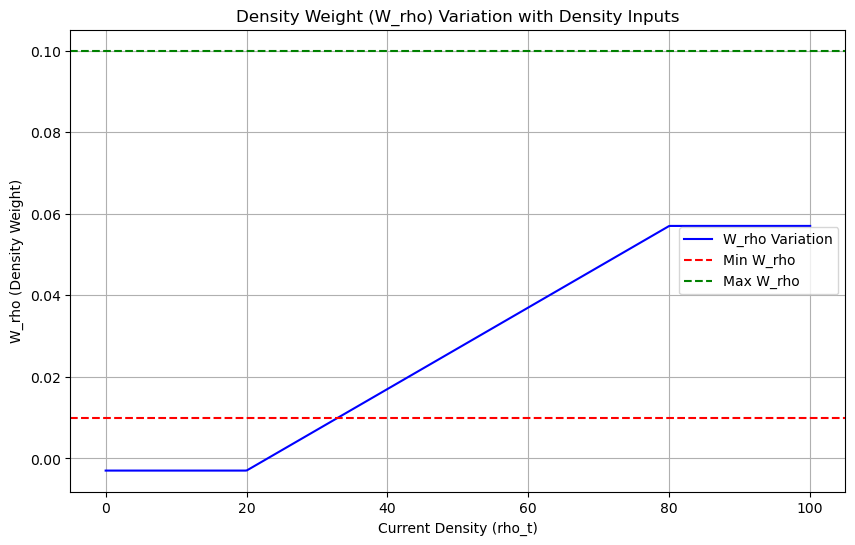

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
rho_t = np.linspace(0, 100, 500)  # Current density range (0 to 100)
rho_avg = 50  # Average density
W_base_rho = 0.027  # Base density weight
F_rho = 0.001  # Sensitivity coefficient for density

# Calculate W_rho
W_rho = (
    W_base_rho
    + np.maximum(-0.03, np.minimum((rho_t - rho_avg) * F_rho, 0.03))
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rho_t, W_rho, label="W_rho Variation", color='blue')
plt.axhline(y=0.01, color='red', linestyle='--', label="Min W_rho")
plt.axhline(y=0.10, color='green', linestyle='--', label="Max W_rho")
plt.title("Density Weight (W_rho) Variation with Density Inputs")
plt.xlabel("Current Density (rho_t)")
plt.ylabel("W_rho (Density Weight)")
plt.legend()
plt.grid()
plt.show()


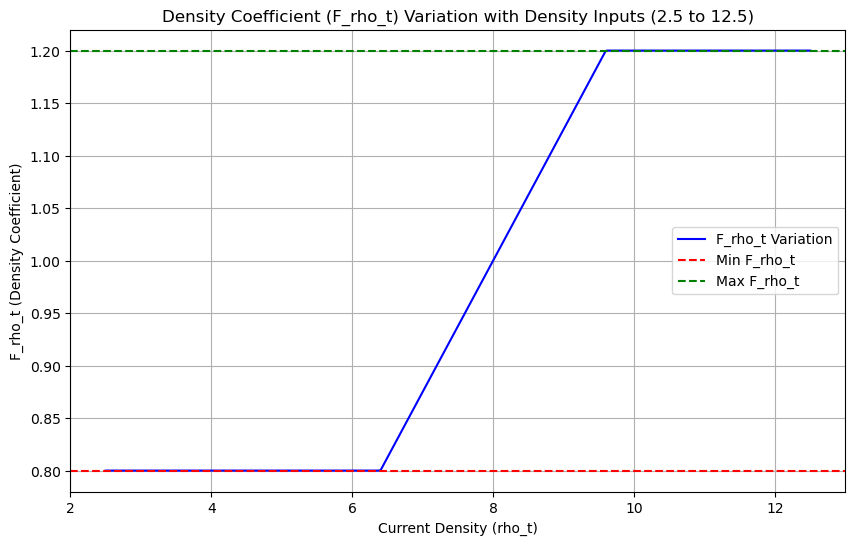

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
rho_t = np.linspace(2.5, 12.5, 500)  # Current density range (2.5 to 12.5)

# Calculate F_rho_t
F_rho_t = np.maximum(0.8, np.minimum(1.2, rho_t / 8.0))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rho_t, F_rho_t, label="F_rho_t Variation", color='blue')
plt.axhline(y=0.8, color='red', linestyle='--', label="Min F_rho_t")
plt.axhline(y=1.2, color='green', linestyle='--', label="Max F_rho_t")
plt.title("Density Coefficient (F_rho_t) Variation with Density Inputs (2.5 to 12.5)")
plt.xlabel("Current Density (rho_t)")
plt.ylabel("F_rho_t (Density Coefficient)")
plt.legend()
plt.grid()
plt.show()


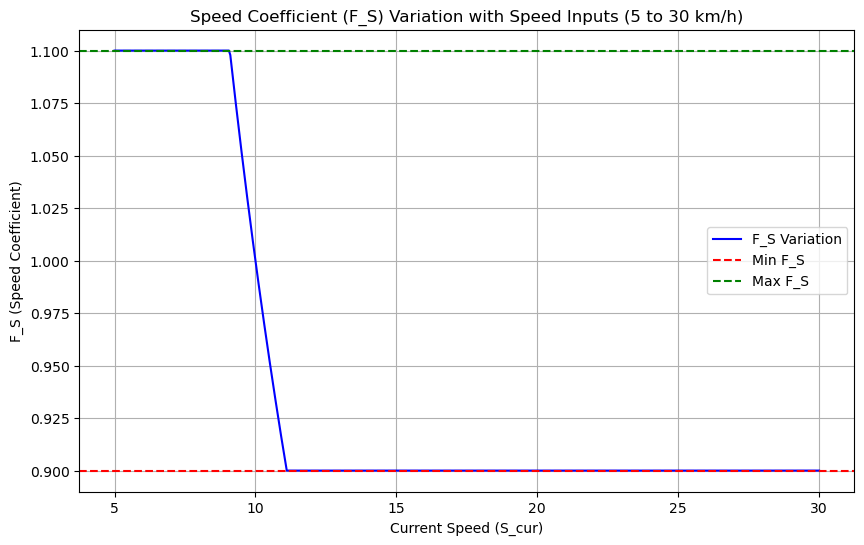

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
S_cur = np.linspace(5, 30, 500)  # Current speed range (5 to 30 km/h)

# Calculate F_S
F_S = np.maximum(0.9, np.minimum(1.1, 10.0 / S_cur))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_cur, F_S, label="F_S Variation", color='blue')
plt.axhline(y=0.9, color='red', linestyle='--', label="Min F_S")
plt.axhline(y=1.1, color='green', linestyle='--', label="Max F_S")
plt.title("Speed Coefficient (F_S) Variation with Speed Inputs (5 to 30 km/h)")
plt.xlabel("Current Speed (S_cur)")
plt.ylabel("F_S (Speed Coefficient)")
plt.legend()
plt.grid()
plt.show()


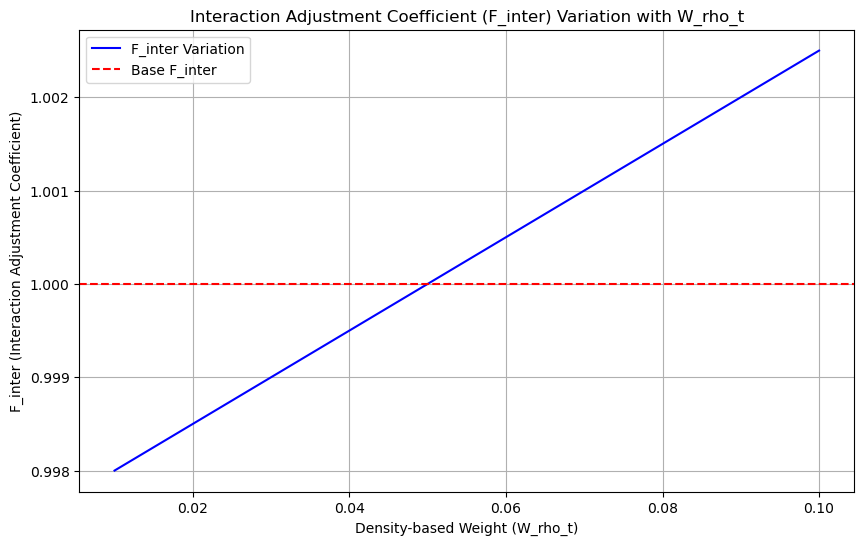

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
W_rho_t = np.linspace(0.01, 0.1, 100)  # Density-based weights (0.01 to 0.1)
W_S = 0.05  # Speed-based weight (fixed for simplicity)

# Calculate F_inter
F_inter = 1.0 + (W_rho_t - W_S) * 0.05

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(W_rho_t, F_inter, label="F_inter Variation", color='blue')
plt.axhline(y=1.0, color='red', linestyle='--', label="Base F_inter")
plt.title("Interaction Adjustment Coefficient (F_inter) Variation with W_rho_t")
plt.xlabel("Density-based Weight (W_rho_t)")
plt.ylabel("F_inter (Interaction Adjustment Coefficient)")
plt.legend()
plt.grid()
plt.show()


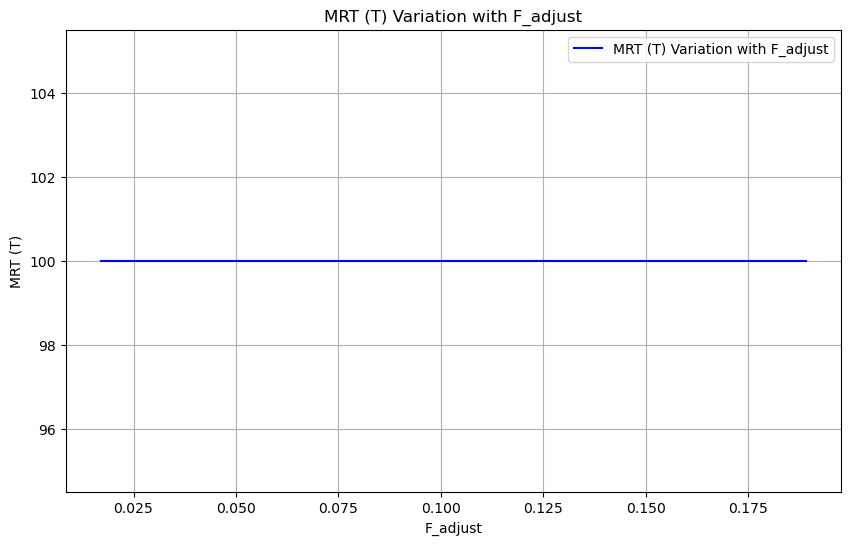

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
T_base = 170.0  # Base MRT
T_min = 100.0  # Minimum MRT
T_max = 300.0  # Maximum MRT

# Define inputs
W_S = np.linspace(0.01, 0.10, 500)  # Speed weight
W_rho = np.linspace(0.01, 0.10, 500)  # Density weight
S_cur = np.linspace(5, 30, 500)  # Current speed (5 to 30 km/h)
rho_t = np.linspace(2.5, 12.5, 500)  # Current density (2.5 to 12.5)
F_inter = 0.9  # Interaction sensitivity coefficient (constant)

# Calculate F_S and F_rho based on their respective formulas
F_S = np.maximum(0.9, np.minimum(1.1, 10.0 / S_cur))  # Speed coefficient
F_rho = np.maximum(0.8, np.minimum(1.2, rho_t / 8.0))  # Density coefficient

# Calculate F_adjust
F_adjust = (W_S * F_S + W_rho * F_rho) * F_inter

# Calculate MRT (T)
T = np.maximum(T_min, np.minimum(T_max, T_base * F_adjust))

# Plotting MRT
plt.figure(figsize=(10, 6))
plt.plot(F_adjust, T, label="MRT (T) Variation with F_adjust", color='blue')
plt.title("MRT (T) Variation with F_adjust")
plt.xlabel("F_adjust")
plt.ylabel("MRT (T)")
plt.legend()
plt.grid()
plt.show()


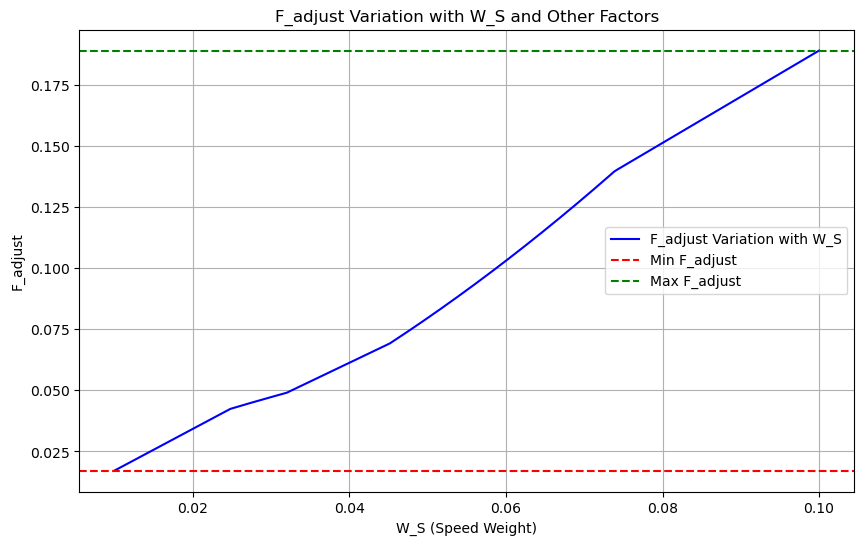

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define inputs based on previously calculated values
W_S = np.linspace(0.01, 0.10, 500)  # Speed weight (varying)
F_S = np.maximum(0.9, np.minimum(1.1, 10.0 / np.linspace(5, 30, 500)))  # Speed coefficient
W_rho = np.linspace(0.01, 0.10, 500)  # Density weight (varying)
F_rho = np.maximum(0.8, np.minimum(1.2, np.linspace(2.5, 12.5, 500) / 8.0))  # Density coefficient
F_inter = 0.9  # Interaction sensitivity coefficient (constant)

# Calculate F_adjust
F_adjust = (W_S * F_S + W_rho * F_rho) * F_inter

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(W_S, F_adjust, label="F_adjust Variation with W_S", color='blue')
plt.axhline(y=min(F_adjust), color='red', linestyle='--', label="Min F_adjust")
plt.axhline(y=max(F_adjust), color='green', linestyle='--', label="Max F_adjust")
plt.title("F_adjust Variation with W_S and Other Factors")
plt.xlabel("W_S (Speed Weight)")
plt.ylabel("F_adjust")
plt.legend()
plt.grid()
plt.show()


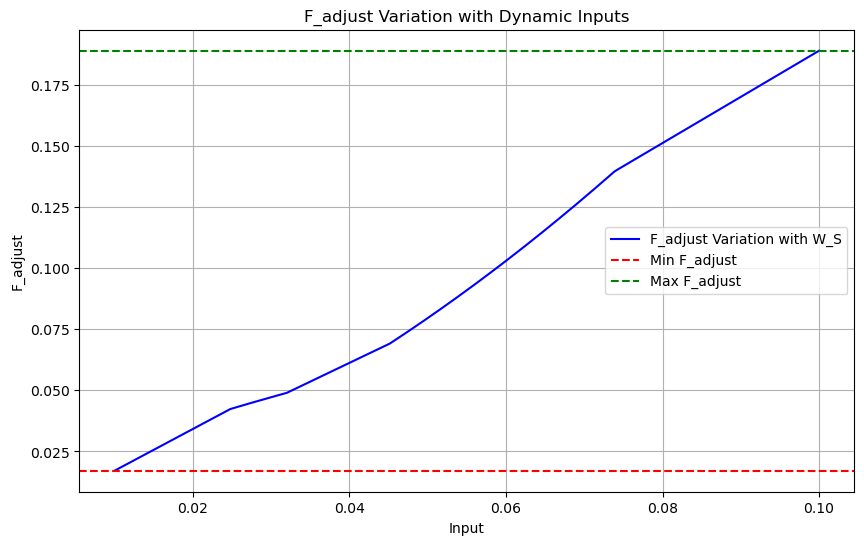

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define inputs
W_S = np.linspace(0.01, 0.10, 500)  # Speed weight
W_rho = np.linspace(0.01, 0.10, 500)  # Density weight
S_cur = np.linspace(5, 30, 500)  # Current speed (5 to 30 km/h)
rho_t = np.linspace(2.5, 12.5, 500)  # Current density (2.5 to 12.5)
F_inter = 0.9  # Interaction sensitivity coefficient (constant)

# Calculate F_S and F_rho based on their respective formulas
F_S = np.maximum(0.9, np.minimum(1.1, 10.0 / S_cur))  # Speed coefficient
F_rho = np.maximum(0.8, np.minimum(1.2, rho_t / 8.0))  # Density coefficient

# Calculate F_adjust
F_adjust = (W_S * F_S + W_rho * F_rho) * F_inter

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(W_S, F_adjust, label="F_adjust Variation with W_S", color='blue')
plt.axhline(y=min(F_adjust), color='red', linestyle='--', label="Min F_adjust")
plt.axhline(y=max(F_adjust), color='green', linestyle='--', label="Max F_adjust")
plt.title("F_adjust Variation with Dynamic Inputs")
plt.xlabel("Input")
plt.ylabel("F_adjust")
plt.legend()
plt.grid()
plt.show()


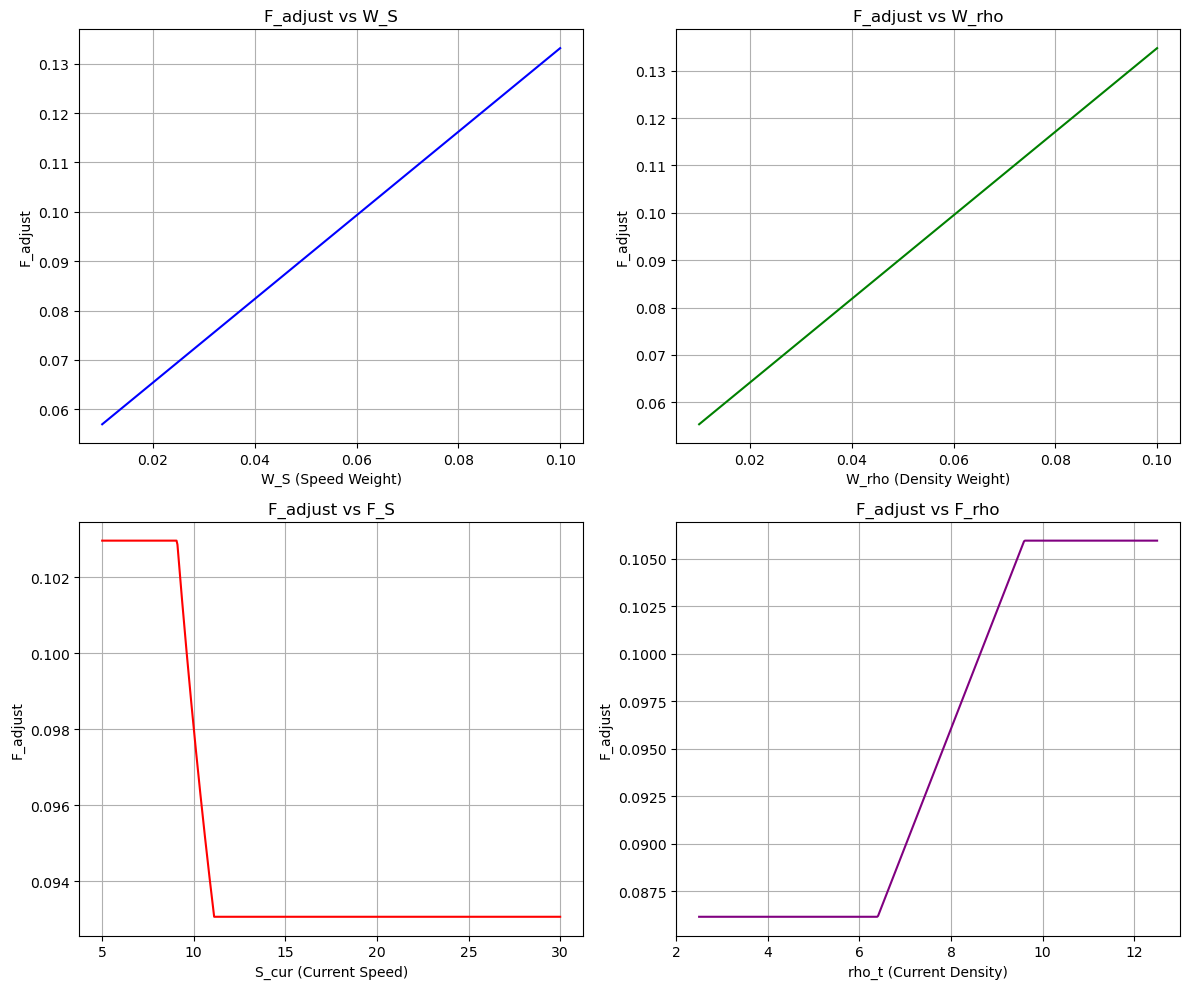

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Provided output ranges
W_S = np.linspace(0.01, 0.10, 500)  # Speed weight
W_rho = np.linspace(0.01, 0.10, 500)  # Density weight
F_S = np.maximum(0.9, np.minimum(1.1, 10.0 / np.linspace(5, 30, 500)))  # Speed coefficient
F_rho = np.maximum(0.8, np.minimum(1.2, np.linspace(2.5, 12.5, 500) / 8.0))  # Density coefficient
F_inter = 0.9  # Interaction sensitivity coefficient (constant)

# Calculate F_adjust
F_adjust_W_S = (W_S * F_S.mean() + W_rho.mean() * F_rho.mean()) * F_inter  # Vary W_S
F_adjust_W_rho = (W_S.mean() * F_S.mean() + W_rho * F_rho.mean()) * F_inter  # Vary W_rho
F_adjust_F_S = (W_S.mean() * F_S + W_rho.mean() * F_rho.mean()) * F_inter  # Vary F_S
F_adjust_F_rho = (W_S.mean() * F_S.mean() + W_rho.mean() * F_rho) * F_inter  # Vary F_rho

# Plotting
plt.figure(figsize=(12, 10))

# Plot for W_S
plt.subplot(2, 2, 1)
plt.plot(W_S, F_adjust_W_S, label="Varying W_S", color='blue')
plt.title("F_adjust vs W_S")
plt.xlabel("W_S (Speed Weight)")
plt.ylabel("F_adjust")
plt.grid()

# Plot for W_rho
plt.subplot(2, 2, 2)
plt.plot(W_rho, F_adjust_W_rho, label="Varying W_rho", color='green')
plt.title("F_adjust vs W_rho")
plt.xlabel("W_rho (Density Weight)")
plt.ylabel("F_adjust")
plt.grid()

# Plot for F_S
plt.subplot(2, 2, 3)
plt.plot(np.linspace(5, 30, 500), F_adjust_F_S, label="Varying F_S", color='red')
plt.title("F_adjust vs F_S")
plt.xlabel("S_cur (Current Speed)")
plt.ylabel("F_adjust")
plt.grid()

# Plot for F_rho
plt.subplot(2, 2, 4)
plt.plot(np.linspace(2.5, 12.5, 500), F_adjust_F_rho, label="Varying F_rho", color='purple')
plt.title("F_adjust vs F_rho")
plt.xlabel("rho_t (Current Density)")
plt.ylabel("F_adjust")
plt.grid()

plt.tight_layout()
plt.show()


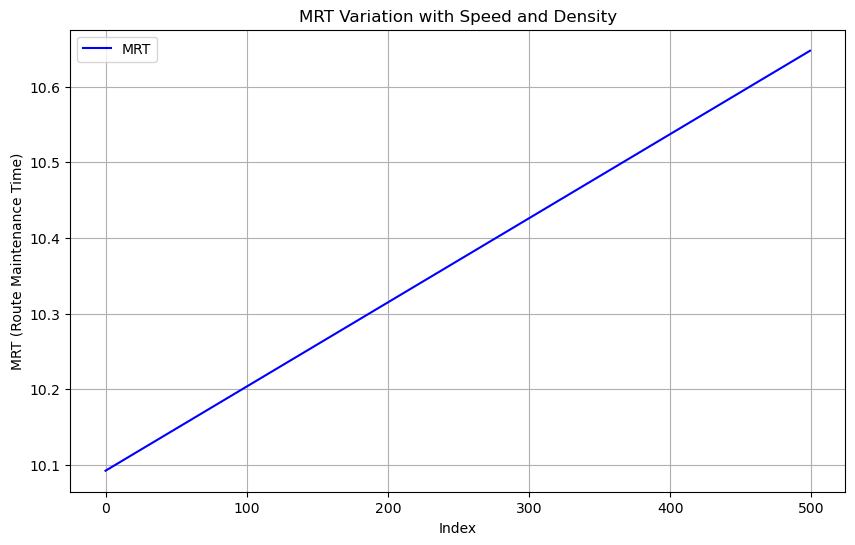

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
base_MRT = 10.0  # Base MRT value
speed = np.linspace(5, 30, 500)  # Speed range (5 to 30 km/h)
density = np.linspace(2.5, 12.5, 500)  # Density range (2.5 to 12.5)
speed_weight = 0.037  # Speed weight
density_weight = 0.037  # Density weight

# Calculate MRT
MRT = base_MRT + (speed_weight * speed) - (density_weight * density)

# Plot MRT
plt.figure(figsize=(10, 6))
plt.plot(range(len(MRT)), MRT, label="MRT", color='blue')
plt.title("MRT Variation with Speed and Density")
plt.xlabel("Index")
plt.ylabel("MRT (Route Maintenance Time)")
plt.legend()
plt.grid()
plt.show()


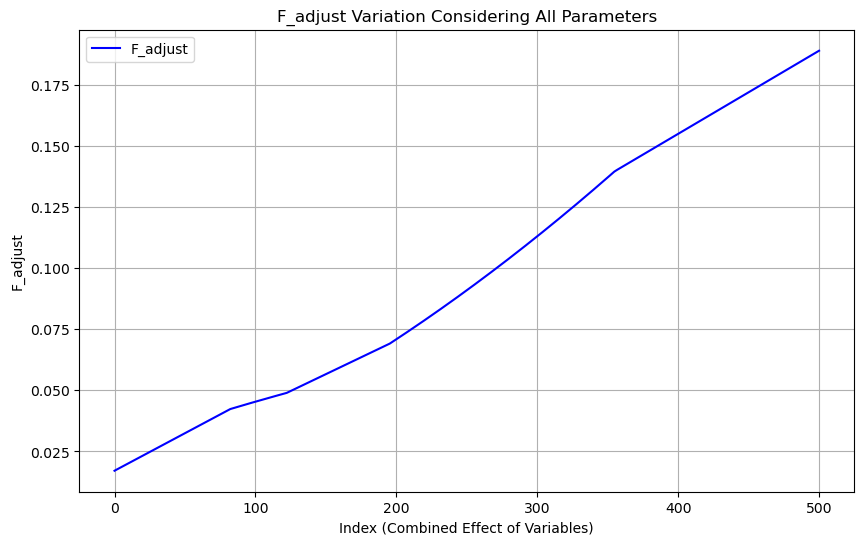

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
W_S = np.linspace(0.01, 0.10, 500)  # Speed weight
W_rho = np.linspace(0.01, 0.10, 500)  # Density weight
F_S = np.maximum(0.9, np.minimum(1.1, 10.0 / np.linspace(5, 30, 500)))  # Speed coefficient
F_rho = np.maximum(0.8, np.minimum(1.2, np.linspace(2.5, 12.5, 500) / 8.0))  # Density coefficient
F_inter = 0.9  # Interaction sensitivity coefficient (constant)

# Calculate F_adjust considering all variables
F_adjust = (W_S * F_S + W_rho * F_rho) * F_inter

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 500, 500), F_adjust, label="F_adjust", color='blue')
plt.title("F_adjust Variation Considering All Parameters")
plt.xlabel("Index (Combined Effect of Variables)")
plt.ylabel("F_adjust")
plt.legend()
plt.grid()
plt.show()


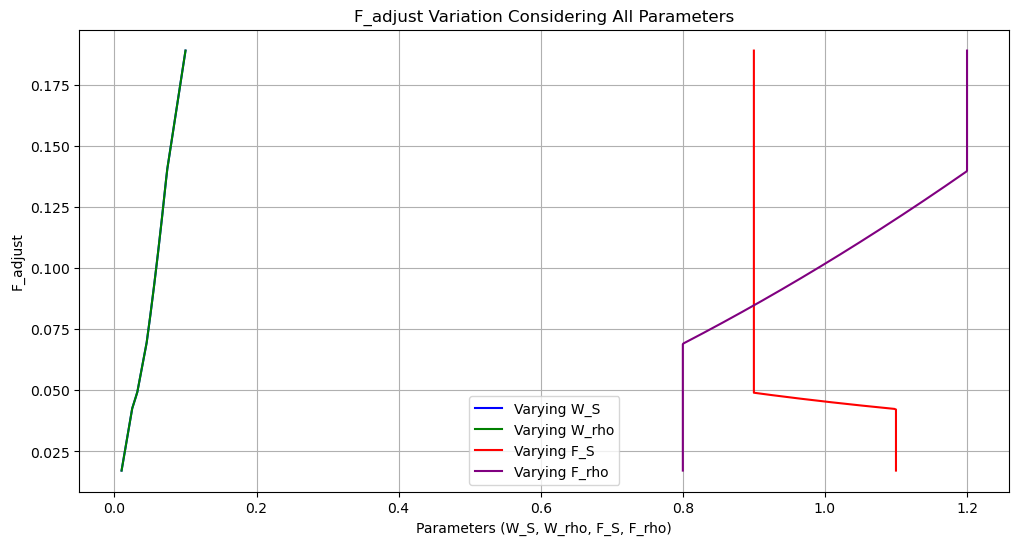

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
W_S = np.linspace(0.01, 0.10, 500)  # Speed weight range
W_rho = np.linspace(0.01, 0.10, 500)  # Density weight range
F_S = np.maximum(0.9, np.minimum(1.1, 10.0 / np.linspace(5, 30, 500)))  # Speed coefficient
F_rho = np.maximum(0.8, np.minimum(1.2, np.linspace(2.5, 12.5, 500) / 8.0))  # Density coefficient
F_inter = 0.9  # Interaction sensitivity coefficient

# Calculate F_adjust
F_adjust = (W_S * F_S + W_rho * F_rho) * F_inter

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(W_S, F_adjust, label="Varying W_S", color='blue')
plt.plot(W_rho, F_adjust, label="Varying W_rho", color='green')
plt.plot(F_S, F_adjust, label="Varying F_S", color='red')
plt.plot(F_rho, F_adjust, label="Varying F_rho", color='purple')
plt.title("F_adjust Variation Considering All Parameters")
plt.xlabel("Parameters (W_S, W_rho, F_S, F_rho)")
plt.ylabel("F_adjust")
plt.legend()
plt.grid()
plt.show()


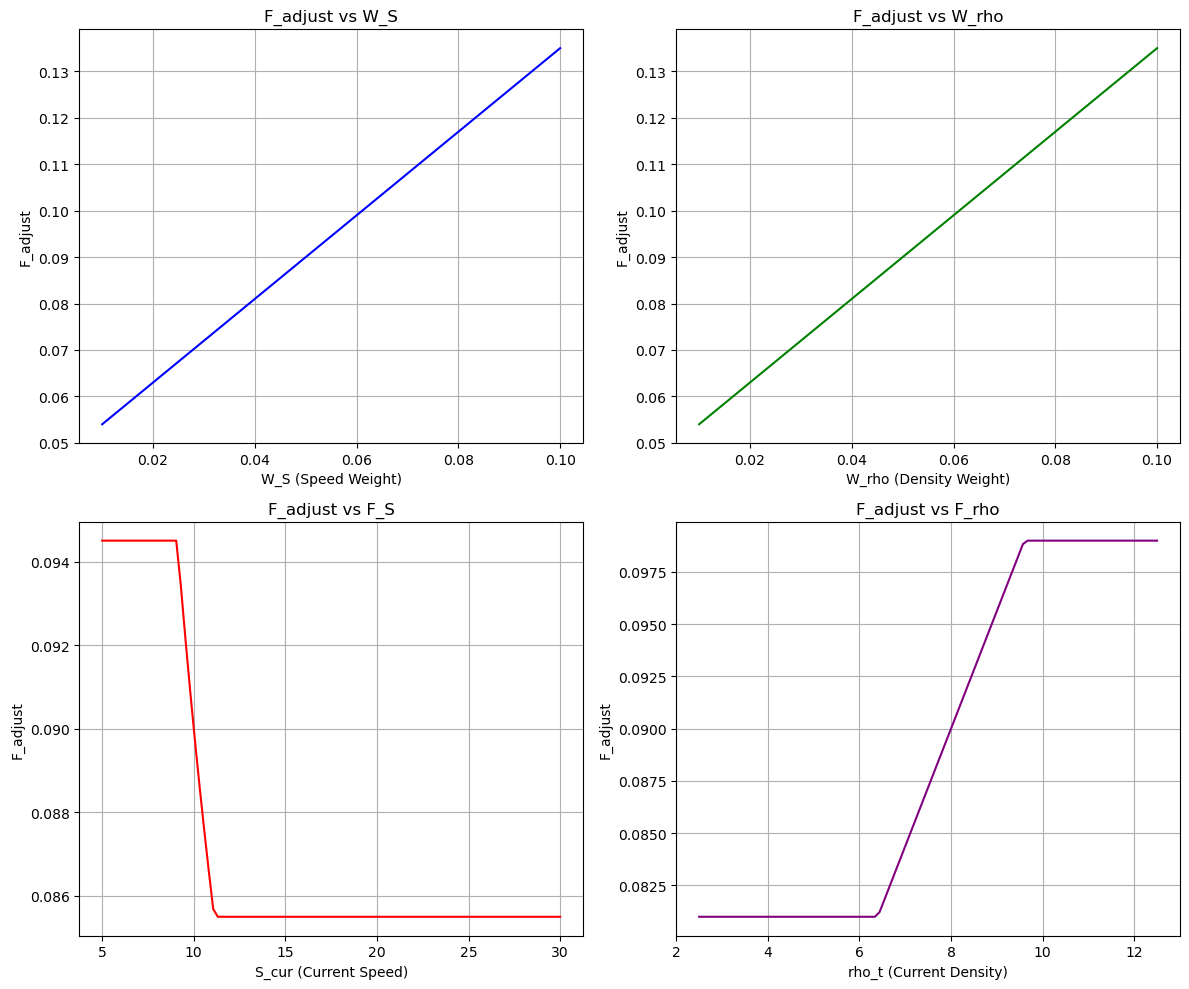

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for variables
W_S = np.linspace(0.01, 0.10, 100)  # Speed weight range
W_rho = np.linspace(0.01, 0.10, 100)  # Density weight range
S_cur = np.linspace(5, 30, 100)  # Current speed range
rho_t = np.linspace(2.5, 12.5, 100)  # Current density range

# Calculate F_S and F_rho
F_S = np.maximum(0.9, np.minimum(1.1, 10.0 / S_cur))  # Speed coefficient
F_rho = np.maximum(0.8, np.minimum(1.2, rho_t / 8.0))  # Density coefficient

# Fixed interaction sensitivity coefficient
F_inter = 0.9

# F_adjust calculation
F_adjust_W_S = (W_S * 1.0 + 0.05 * 1.0) * F_inter  # Varying W_S
F_adjust_W_rho = (0.05 * 1.0 + W_rho * 1.0) * F_inter  # Varying W_rho
F_adjust_F_S = (0.05 * F_S + 0.05 * 1.0) * F_inter  # Varying F_S
F_adjust_F_rho = (0.05 * 1.0 + 0.05 * F_rho) * F_inter  # Varying F_rho

# Plotting
plt.figure(figsize=(12, 10))

# F_adjust vs W_S
plt.subplot(2, 2, 1)
plt.plot(W_S, F_adjust_W_S, label="Varying W_S", color='blue')
plt.title("F_adjust vs W_S")
plt.xlabel("W_S (Speed Weight)")
plt.ylabel("F_adjust")
plt.grid()

# F_adjust vs W_rho
plt.subplot(2, 2, 2)
plt.plot(W_rho, F_adjust_W_rho, label="Varying W_rho", color='green')
plt.title("F_adjust vs W_rho")
plt.xlabel("W_rho (Density Weight)")
plt.ylabel("F_adjust")
plt.grid()

# F_adjust vs F_S
plt.subplot(2, 2, 3)
plt.plot(S_cur, F_adjust_F_S, label="Varying F_S", color='red')
plt.title("F_adjust vs F_S")
plt.xlabel("S_cur (Current Speed)")
plt.ylabel("F_adjust")
plt.grid()

# F_adjust vs F_rho
plt.subplot(2, 2, 4)
plt.plot(rho_t, F_adjust_F_rho, label="Varying F_rho", color='purple')
plt.title("F_adjust vs F_rho")
plt.xlabel("rho_t (Current Density)")
plt.ylabel("F_adjust")
plt.grid()

plt.tight_layout()
plt.show()
